Environment: Observing

Run initialize_sas.bash

In [1]:
import sys
module_path = '/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735/lib/python' # or the path to your source code
sys.path.insert(0, module_path)
%env SAS_PATH=/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735
%env SAS_PATH=$SAS_PATH/config/ftools:$SAS_PATH
from pysas.wrapper import Wrapper as w
import os
import os.path
import glob
import numpy as np
from astropy.io import fits
from astropy.table import Table

from extraction_fcns import extract_lc, extract_spectrum, plot_LC, plot_region, plot_region_om, plot_spectrum, rolling_median

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Georgia']
rcParams['font.weight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.linewidth'] = 1

env: SAS_PATH=/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735
env: SAS_PATH=$SAS_PATH/config/ftools:$SAS_PATH


In [2]:
work_dir = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/'
sas_file = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/'

inargs = [f'sas_ccf={sas_file}ccf.cif', f'sas_odf={sas_file}2232_0671960101_SCX00000SUM.SAS', f'workdir={work_dir}']

w('startsas', inargs).run()

startsas - WARNING - Executing /Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735/lib/python/pysas/startsas/startsas.py {'odfid': '', 'workdir': '/Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/', 'sasfiles': 'yes', 'sas_ccf': '/Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/ccf.cif', 'sas_odf': '/Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/2232_0671960101_SCX00000SUM.SAS', 'level': 'ODF', 'cifbuild_opts': '', 'odfingest_opts': ''}
startsas - ERROR - Summary file PATH /Users/woodml/Observing/XMM-Newton/0671960101 does not exist.




        Starting SAS session
    
        Working directory = /Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/
    
        
SAS_CCF = /Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/ccf.cif


Exception: Summary file PATH /Users/woodml/Observing/XMM-Newton/0671960101 does not exist.

# Basic LC Extraction, EMOS & EPN

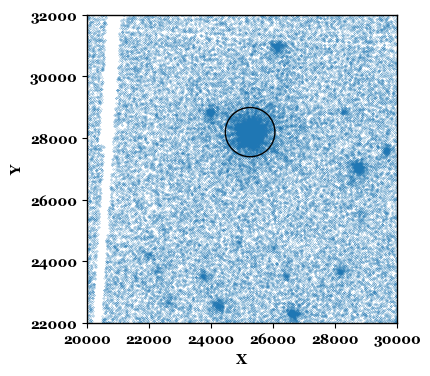



Extracting source LC




Time limits
Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12)&&((X,Y) IN circle(25260.645,28188.236,800))&&(PI in [200.0:10000.0])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raim

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS1_S001_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc.lc:STDGTI01,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc.lc:STDGTI02,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc.lc:STDGTI03,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SU

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX02:RAWX and temp_badcol.ds:BADPIX02:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX03:RAWX and temp_badcol.ds:BADPIX03:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX04:RAWX and temp_badcol.ds:BADPIX04:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX05:RAWX and temp_badcol.ds:BADPIX05:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX07:RAWX and temp_badcol.ds:BADPIX07:RAWX is either non-existe

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset on_ancillary.ds.
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-09T19:22:36.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-09T19:22:36.000
epiclccorr:- Done.
epiclccorr:- Reading ancillary file... spectrum_SUAur_EMOS1_lc.lc
epiclccorr:- Done.
epiclccorr:- Weighted Mean 1.215261001548951336
epiclccorr:- selected 2913 rows from the source input table.
epiclccorr:- Closing event file dataset
epiclccorr:- Extraction region lies in CCD number 1
epiclccorr:- Calculating the relative corrections for each CCD...
epiclccorr:- STDGTI01 extension found 
epiclccorr:- Processing GTI extension: STDGTI01 corresponding to CCD 1
epiclccorr:- STDGTI02 extension found 
epiclccorr:- STDGTI03 extension found 
epiclccorr:- STDGTI04 extension found 
epiclccorr:- STDGTI05 extens

epiclccorr::arfgen:- Executing (routine): arfgen spectrumset=spectrum_SUAur_EMOS1_bkg_lc.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes modelquantumeff=yes modelfiltertrans=yes modelcontamination=yes modelee=yes modelootcorr=yes applyxcaladjustment=no applyabsfluxcorr=no eegridfactor=100 withbadpixcorr=yes badpixlocation=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS1_S001_ImagingEvts.ds psfmodel=ELLBETA badpixelresolution=2 withbadpixres=no badpixmaptype=flat setbackscale=yes keeparfset=yes useodfatt=no ignoreoutoffov=yes crossreg_spectrumset='' crossregionarf=no  -w 1 -V 4
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] started:  20

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0.7652901954 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset bkg_ancillary.ds.
epiclccorr::arfgen:- Opening spectrumset spectrum_SUAur_EMOS1_bkg_lc.lc...
epiclccorr::arfgen:- Opened spectrumset spectrum_SUAur_EMOS1_bkg_lc.lc...
epiclccorr::arfgen:- Opened table spectrum_SUAur_EMOS1_bkg_lc.lc...
epiclccorr::arfgen:- current backscale value is: 1
epiclccorr::arfgen:- deleted attspectrum_SUAur_EMOS1_bkg_lc.lc...
epiclccorr::arfgen:- Backscale value is: 10118876
epiclccorr::arfgen:- added attspectrum_SUAur_EMOS1_bkg_lc.lc...
epiclccorr::arfgen:- closed specspectrum_SUAur_EMOS1_bkg_lc.lc...
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-09T19:22:42.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-09T19:22:42.000
epiclccorr:- Done.
epiclccorr:- Reading Spectrum... spectrum_SUAur_EMOS1_bkg_lc.lc
epiclccorr:- Subs

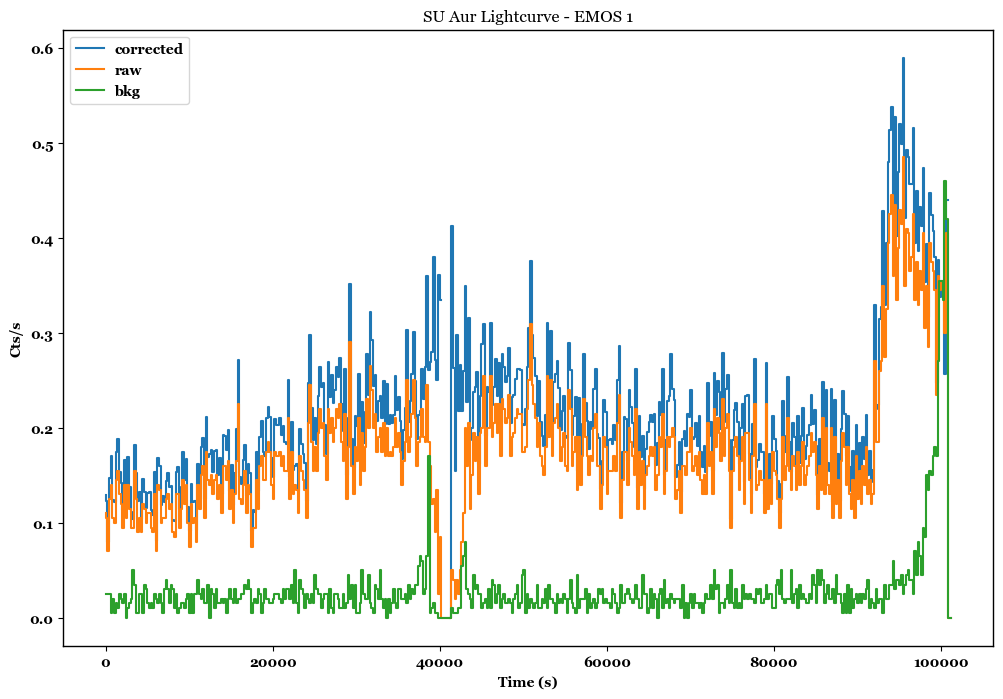

In [3]:
# SU Aur EMOS 1 Extraction

# Prepare
region_1     = (25260.645, 28188.236)
radius       = 800
bkg_1        = (25260.645, 25000.5)
bkg_radius   = 1800

q_flag       = "#XMMEA_EMOS1" # Quality flag for EPIC pn
n_pattern    = 12          # Pattern selection
pi_min       = 200.        # Low energy range eV
pi_max       = 10000.      # High energy range eV
t_min        = 445727565.0
t_max        = 445828820.0
lc_bin       = 200         # Lightcurve bin in secs

event_file   = '2232_0671960101_EMOS1_S001_ImagingEvts.ds'
source_file  = 'SUAur_EMOS1_lc.lc'
bkg_file     = 'SUAur_EMOS1_bkg_lc.lc' 
final_file   = 'SUAur_EMOS1_final_lc.lc'

# Extract
extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, region_1, radius, bkg_1, bkg_radius, 
           work_dir, event_file, source_file, bkg_file, final_file, time_min=t_min, time_max=t_max)

# Plot

plt.figure(figsize=(12,8))  # Size of figure

plot_LC(plt, final_file, label='corrected')          # Plot corrected light curve
plot_LC(plt, source_file, label='raw')       # Plot source region light curve
plot_LC(plt, bkg_file, label='bkg')       # Plot background region light curve

plt.legend(loc='upper left')
plt.title('SU Aur Lightcurve - EMOS 1')
plt.savefig('SUAur_LC_EMOS1.pdf', bbox_inches='tight', pad_inches=0.1, format='pdf')
plt.show()

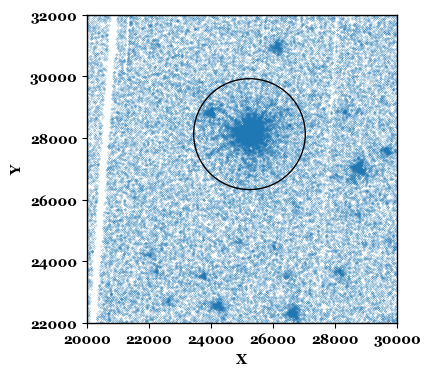



Extracting source LC




Time limits
Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS2&&(PATTERN<=12)&&((X,Y) IN circle(25240.35,28123.166,1800.0))&&(PI in [200.0:10000.0])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' ra

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS2_S002_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc.lc:STDGTI01,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc.lc:STDGTI02,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc.lc:STDGTI03,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SU

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T19:46:43.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:46:43.000
Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX02:RAWX and temp_badcol.ds:BADPIX02:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX03:RAWX and temp_b

epiclccorr::arfgen:- Writing energy data into dataset .. 
epiclccorr::arfgen:- Calculating Area curve ...
epiclccorr::arfgen:- Calculating Area curve ...2.5 2400 11997.5
epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset on_ancillary.ds.
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:46:58.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:46:58.000
epiclccorr:- Done.
epiclccorr:- Reading ancillary file... spectrum_SUAur_EMOS2_lc.lc
epiclccorr:- Done.
epiclccorr:- Weighted Mean 1.143181243235395383
epiclccorr:- selected 2734 rows from the source input table.
epiclccorr:- Closing event file dataset
epiclccorr:- Extraction region lies in CCD number 1
epiclccorr:- Calculating the relative corrections for each CCD...
epiclccorr:- STDGTI01 extension found 
epiclccorr:- Processing GTI extension: STDGTI0

epiclccorr::evselect:- selected 2734 rows from the input table.
** epiclccorr::evselect: warning (NonStandardSpectrum), The standard PI channel range for MOS is 0-11999. Detector matrices can not be created for this spectrum and spectral fitting will not be possible.
epiclccorr::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:47:00.000
epiclccorr:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:47:00.000
epiclccorr:- Done.
epiclccorr:- Calculating arfgen...
epiclccorr:- Executing (invoked): arfgen spectrumset=spectrum_SUAur_EMOS2_bkg_lc.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes modelquantumeff=ye

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T19:47:03.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:47:03.000
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T19:47:03.000
epiclccor

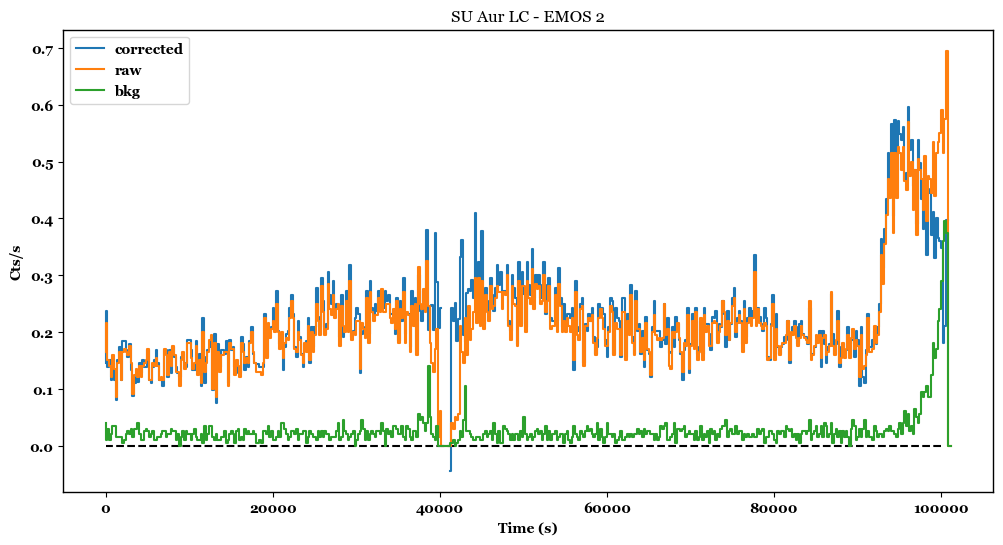

In [6]:
# SU Aur EMOS 2 Extraction

# Prepare
region_2     = (25240.35, 28123.166)
radius       = 800.
bkg_2        = (25240.35, 25000.5) 
radius       = 1800.

q_flag       = "#XMMEA_EMOS2"
n_pattern    = 12          # Pattern selection
pi_min       = 200.        # Low energy range eV
pi_max       = 10000.      # High energy range eV
time_min     = 445727565.0
time_max     = 445828820.0
lc_bin       = 200         # Lightcurve bin in secs

event_file   = '2232_0671960101_EMOS2_S002_ImagingEvts.ds'
source_file  = 'SUAur_EMOS2_lc.lc'
bkg_file     = 'SUAur_EMOS2_bkg_lc.lc' 
final_file   = 'SUAur_EMOS2_final_lc.lc'

# Extract
extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, region_2, radius, bkg_2, 
               bkg_radius, work_dir, event_file, source_file, bkg_file, final_file, time_min, time_max,)

# Plot
plt.figure(figsize=(12,6))  # Size of figure
plot_LC(plt, final_file, label='corrected')          # Plot corrected light curve
plot_LC(plt, source_file, label='raw')       # Plot source region light curve
plot_LC(plt, bkg_file, label='bkg')       # Plot background region light curve
plt.hlines(0,100000, 0, 'k','--', zorder=0)
plt.title('SU Aur LC - EMOS 2')
plt.legend(loc='upper left')
plt.savefig('SUAur_LC_EMOS2.pdf', bbox_inches='tight', pad_inches=0.1, format='pdf')
plt.show()

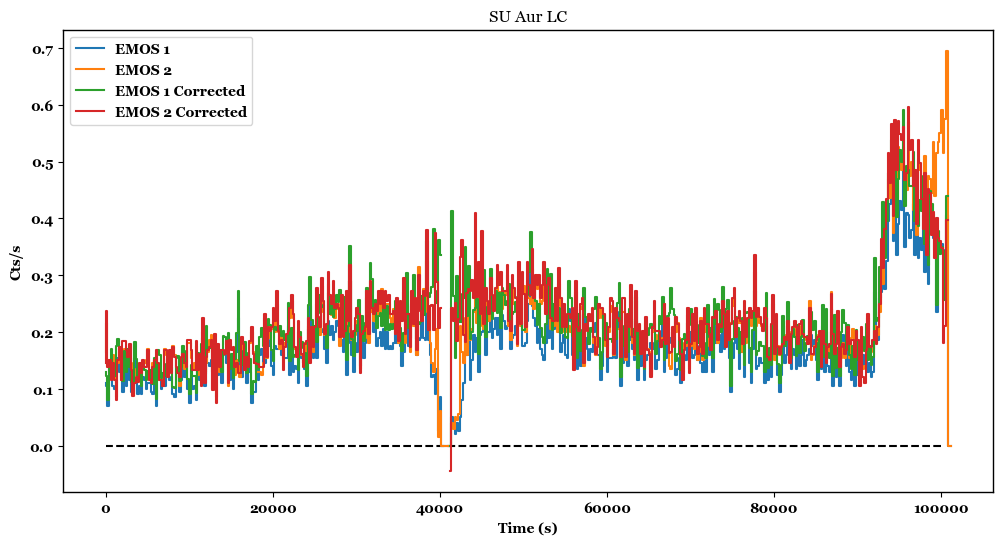

In [8]:
# Plot both SU Aur EMOS
plt.figure(figsize=(12,6))  # Size of figure
plot_LC(plt, 'SUAur_EMOS1_lc.lc', label='EMOS 1')
plot_LC(plt, 'SUAur_EMOS2_lc.lc', label='EMOS 2')
plot_LC(plt, 'SUAur_EMOS1_final_lc.lc', label='EMOS 1 Corrected')
plot_LC(plt, 'SUAur_EMOS2_final_lc.lc', label='EMOS 2 Corrected')
plt.hlines(0,100000, 0, 'k','--', zorder=0)
plt.title('SU Aur LC')
plt.legend(loc='upper left')
plt.savefig('SUAur_LC_EMOS.pdf', bbox_inches='tight', pad_inches=0.1, format='pdf')
plt.show()

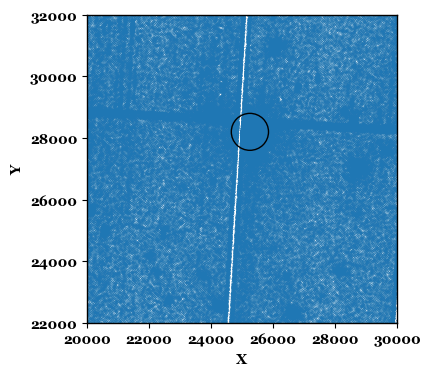



Extracting source LC




Time limits
Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN circle(25254.175,28197.344,600.0))&&(PI in [200.0:10000.0])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagec

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( ( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:STDGTI02,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:STDGTI03,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:REG00105

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( ( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:STDGTI02,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:STDGTI03,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:REG00105

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( ( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:STDGTI02,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:STDGTI03,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:REG00105

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( ( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:STDGTI02,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:STDGTI03,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_PN_lc.lc:REG00105

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- Writing energy data into dataset .. 
epiclccorr::arfgen:- Calculating Area curve ...
epiclccorr::arfgen:- Calculating Area curve ...50.5 2067 15997.5
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T20:12:08.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:12:08.000
epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~98.17531574 %
epiclccorr::arfg

epiclccorr::arfgen:- Executing (routine): arfgen spectrumset=/var/tmp/tmp.5.1I45Myspectrum_ccd7.fits rmfset=response.ds withrmfset=no arfset=src_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=no modeleffarea=yes modelquantumeff=yes modelfiltertrans=yes modelcontamination=yes modelee=yes modelootcorr=yes applyxcaladjustment=no applyabsfluxcorr=no eegridfactor=100 withbadpixcorr=yes badpixlocation=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds psfmodel=ELLBETA badpixelresolution=2 withbadpixres=no badpixmaptype=flat setbackscale=yes keeparfset=yes useodfatt=no ignoreoutoffov=yes crossreg_spectrumset='' crossregionarf=no  -w 1 -V 4
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] starte

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX10:RAWX and temp_badcol.ds:BADPIX10:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- Writing energy data into dataset .. 
epiclccorr::arfgen:- Calculating Area curve ...
epiclccorr::arfgen:- Calculating Area curve ...50.5 2067 15997.5
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T20:12:23.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:12:23.000
epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~99.98445712 %
epiclccorr::arfg

epiclccorr::evselect:- selected 45085 rows from the input table.
** epiclccorr::evselect: warning (NonStandardSpectrum), The standard PI channel range for PN is 0-20479. Detector matrices can not be created for this spectrum and spectral fitting will not be possible.
epiclccorr::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:13:04.000
epiclccorr:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:13:04.000
epiclccorr:- Done.
epiclccorr:- Calculating arfgen...
epiclccorr:- Executing (invoked): arfgen spectrumset=spectrum_SUAur_PN_lc.lc rmfset=response.ds withrmfset=no arfset=src_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=no modeleffarea=yes modelquantumeff=yes modelf

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T20:13:06.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:13:06.000
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T20:13:06.000
epiclccor

epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:13:10.000
epiclccorr::arfgen:- Writing energy data into dataset .. 
epiclccorr::arfgen:- Calculating Area curve ...
epiclccorr::arfgen:- Calculating Area curve ...50.5 2067 15997.5
epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset on_ancillary.ds.
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:13:11.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:13:11.000
epiclccorr:- Done.
epiclccorr:- Reading ancillary file... spectrum_SUAur_PN_lc.lc
epiclccorr:- Done.
epiclccorr:- Weighted Mean 1.456289019637352355
epiclccorr:- selected 3780 rows from the source input table.
epiclccorr:- Closing event file dataset
epiclccorr:- Extraction region lies in CCD number 4
epiclccorr:- Calculating the relative correc

epiclccorr::evselect:- selected 3780 rows from the input table.
** epiclccorr::evselect: warning (NonStandardSpectrum), The standard PI channel range for PN is 0-20479. Detector matrices can not be created for this spectrum and spectral fitting will not be possible.
epiclccorr::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:13:36.000
epiclccorr:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:13:36.000
epiclccorr:- Done.
epiclccorr:- Calculating arfgen...
epiclccorr:- Executing (invoked): arfgen spectrumset=spectrum_SUAur_EPN_bkg_lc.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes modelquantumeff=yes m

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T20:13:38.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:13:38.000
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T20:13:38.000
epiclccor

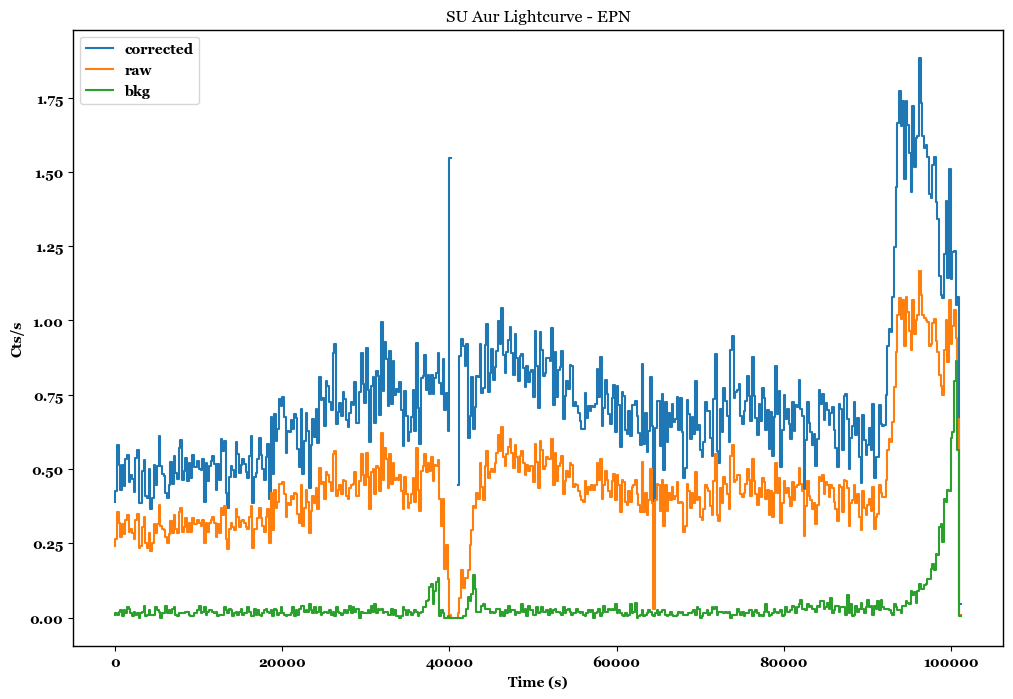

In [9]:
# SU Aur EPN

# Prepare
# - - - - - - - - - - - - - - - - - - -
SU_Aur_region = (25254.175, 28197.344)
radius       = 600.
SU_Aur_bkg = (26455.5, 26965.5)
bkg_radius       = 800

q_flag       = "#XMMEA_EP" # Quality flag for EPIC pn
n_pattern    = 4          # Pattern selection
pn_pi_min    = 200.        # Low energy range eV
pn_pi_max    = 10000.      # High energy range eV
lc_bin       = 200         # Lightcurve bin in secs

event_file   = '2232_0671960101_EPN_S003_ImagingEvts.ds'
source_file  = 'SUAur_PN_lc.lc'               
bkg_file     = 'SUAur_EPN_bkg_lc.lc'
final_file   = 'SUAur_EPN_final_lc.lc'

# Extract
# - - - - - - - - - - - - - - - - - - -
extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, SU_Aur_region, radius, SU_Aur_bkg, 
               bkg_radius, work_dir, event_file, source_file, bkg_file, final_file, time_min, time_max)

# Plot
# - - - - - - - - - - - - - - - - - - -
plt.figure(figsize=(12,8))  # Size of figure

plot_LC(plt, final_file, label='corrected')          # Plot corrected light curve
plot_LC(plt, source_file, label='raw')       # Plot source region light curve
plot_LC(plt, bkg_file, label='bkg')       # Plot background region light curve

plt.legend(loc='upper left')
plt.title('SU Aur Lightcurve - EPN')
plt.savefig('SUAur_LC_EPN.pdf', bbox_inches='tight', pad_inches=0.1, format='pdf')
plt.show()

Executing: 
elcbuild sets='SUAur_EMOS1_final_lc.lc SUAur_EMOS2_final_lc.lc SUAur_EPN_final_lc.lc' outset='/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_combined_lc.lc' 
elcbuild:- Executing (routine): elcbuild sets='SUAur_EMOS1_final_lc.lc SUAur_EMOS2_final_lc.lc SUAur_EPN_final_lc.lc' outset=/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_combined_lc.lc  -w 1 -V 4
elcbuild:- elcbuild (elcbuild-1.10)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-08T21:44:06.000
elcbuild:- elcbuild (elcbuild-1.10)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-08T21:44:06.000
Filename: /Users/woodml/Observing/XMM-Newton/0671960101/SUAur_combined_lc.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  RATE          1 BinTableHDU     81   507R x 5C   [3E, 3E, 3E, 3E, 3E]   


/Users/woodml/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


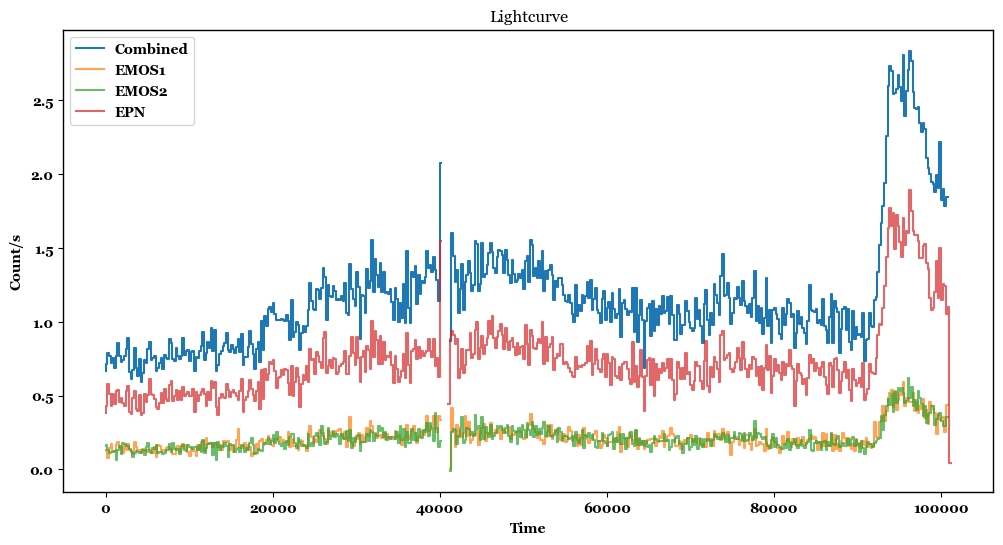

In [15]:
# Combine LCs
# - - - - - - - - - - - - - - - - 

combined_file = work_dir+'SUAur_combined.lc'   # Name of the output corrected lightcurve

# SAS Command
cmd        = "elcbuild" # SAS task to be executed                  

# Arguments of SAS Command
inargs     = [f'sets=SUAur_EMOS1_final_lc.lc SUAur_EMOS2_final_lc.lc SUAur_EPN_final_lc.lc',
             f'outset={combined_file}']

w(cmd, inargs).run()

# Plot combined LC
hdul = fits.open(combined_file)
hdul.info()

lc = Table(hdul[1].data)

x = np.arange(hdul[1].header['TSTART'], hdul[1].header['TSTOP'], hdul[1].header['TIMEDEL'])-hdul[1].header['TSTART']

plt.figure(figsize=(12,6))
plt.step(x, np.sum(lc['RATE'], 1), label='Combined')
plotLC(plt, 'SUAur_EMOS1_final_lc.lc', label='EMOS1', alpha=0.7)
plotLC(plt, 'SUAur_EMOS2_final_lc.lc', label='EMOS2', alpha=0.7)
plotLC(plt, 'SUAur_EPN_final_lc.lc', label='EPN', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Count/s')
plt.legend()
plt.title('SU Aur Combined LC')
plt.savefig('SUAur_combined_LC.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Soft and Hard LCs

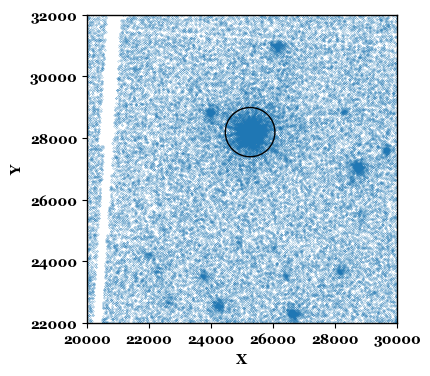

Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12)&&((X,Y) IN circle(25260.645,28188.236,800))&&(PI in [200.0:1500])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspect

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS1_S001_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc_soft.lc:STDGTI01,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc_soft.lc:STDGTI02,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc_soft.lc:STDGTI03,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/X

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX02:RAWX and temp_badcol.ds:BADPIX02:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX03:RAWX and temp_badcol.ds:BADPIX03:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX04:RAWX and temp_badcol.ds:BADPIX04:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX05:RAWX and temp_badcol.ds:BADPIX05:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX07:RAWX and temp_badcol.ds:BADPIX07:RAWX is either non-existe

epiclccorr::arfgen:- Writing energy data into dataset .. 
epiclccorr::arfgen:- Calculating Area curve ...
epiclccorr::arfgen:- Calculating Area curve ...2.5 2400 11997.5
epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset on_ancillary.ds.
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:04:49.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:04:49.000
epiclccorr:- Done.
epiclccorr:- Reading ancillary file... spectrum_SUAur_EMOS1_lc_soft.lc
epiclccorr:- Done.
epiclccorr:- Weighted Mean 1.218660463662604165
epiclccorr:- selected 1023 rows from the source input table.
epiclccorr:- Closing event file dataset
epiclccorr:- Extraction region lies in CCD number 1
epiclccorr:- Calculating the relative corrections for each CCD...
epiclccorr:- STDGTI01 extension found 
epiclccorr:- Processing GTI extension: ST

epiclccorr::arfgen:- Executing (routine): arfgen spectrumset=spectrum_SUAur_EMOS1_bkg_lc_soft.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes modelquantumeff=yes modelfiltertrans=yes modelcontamination=yes modelee=yes modelootcorr=yes applyxcaladjustment=no applyabsfluxcorr=no eegridfactor=100 withbadpixcorr=yes badpixlocation=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS1_S001_ImagingEvts.ds psfmodel=ELLBETA badpixelresolution=2 withbadpixres=no badpixmaptype=flat setbackscale=yes keeparfset=yes useodfatt=no ignoreoutoffov=yes crossreg_spectrumset='' crossregionarf=no  -w 1 -V 4
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] started

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0.7652901954 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset bkg_ancillary.ds.
epiclccorr::arfgen:- Opening spectrumset spectrum_SUAur_EMOS1_bkg_lc_soft.lc...
epiclccorr::arfgen:- Opened spectrumset spectrum_SUAur_EMOS1_bkg_lc_soft.lc...
epiclccorr::arfgen:- Opened table spectrum_SUAur_EMOS1_bkg_lc_soft.lc...
epiclccorr::arfgen:- current backscale value is: 1
epiclccorr::arfgen:- deleted attspectrum_SUAur_EMOS1_bkg_lc_soft.lc...
epiclccorr::arfgen:- Backscale value is: 10118876
epiclccorr::arfgen:- added attspectrum_SUAur_EMOS1_bkg_lc_soft.lc...
epiclccorr::arfgen:- closed specspectrum_SUAur_EMOS1_bkg_lc_soft.lc...
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:04:54.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:04:54.000
epiclccorr:- Done.
epiclccorr:- Reading Spectrum... spectrum_SUAur_EMO

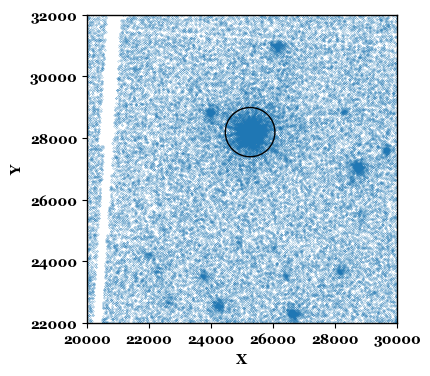

Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12)&&((X,Y) IN circle(25260.645,28188.236,800))&&(PI in [1500:10000.0])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspe

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS1_S001_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc_hard.lc:STDGTI01,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc_hard.lc:STDGTI02,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS1_lc_hard.lc:STDGTI03,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observi

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX02:RAWX and temp_badcol.ds:BADPIX02:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX03:RAWX and temp_badcol.ds:BADPIX03:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX04:RAWX and temp_badcol.ds:BADPIX04:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX05:RAWX and temp_badcol.ds:BADPIX05:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX07:RAWX and temp_badcol.ds:BADPIX07:RAWX is either non-existe

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset on_ancillary.ds.
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:05:07.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:05:07.000
epiclccorr:- Done.
epiclccorr:- Reading ancillary file... spectrum_SUAur_EMOS1_lc_hard.lc
epiclccorr:- Done.
epiclccorr:- Weighted Mean 1.210500026257003814
epiclccorr:- selected 1892 rows from the source input table.
epiclccorr:- Closing event file dataset
epiclccorr:- Extraction region lies in CCD number 1
epiclccorr:- Calculating the relative corrections for each CCD...
epiclccorr:- STDGTI01 extension found 
epiclccorr:- Processing GTI extension: STDGTI01 corresponding to CCD 1
epiclccorr:- STDGTI02 extension found 
epiclccorr:- STDGTI03 extension found 
epiclccorr:- STDGTI04 extension found 
epiclccorr:- STDGTI05 e

epiclccorr::arfgen:- Executing (routine): arfgen spectrumset=spectrum_SUAur_EMOS1_bkg_lc_hard.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes modelquantumeff=yes modelfiltertrans=yes modelcontamination=yes modelee=yes modelootcorr=yes applyxcaladjustment=no applyabsfluxcorr=no eegridfactor=100 withbadpixcorr=yes badpixlocation=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS1_S001_ImagingEvts.ds psfmodel=ELLBETA badpixelresolution=2 withbadpixres=no badpixmaptype=flat setbackscale=yes keeparfset=yes useodfatt=no ignoreoutoffov=yes crossreg_spectrumset='' crossregionarf=no  -w 1 -V 4
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] started

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0.7652901954 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset bkg_ancillary.ds.
epiclccorr::arfgen:- Opening spectrumset spectrum_SUAur_EMOS1_bkg_lc_hard.lc...
epiclccorr::arfgen:- Opened spectrumset spectrum_SUAur_EMOS1_bkg_lc_hard.lc...
epiclccorr::arfgen:- Opened table spectrum_SUAur_EMOS1_bkg_lc_hard.lc...
epiclccorr::arfgen:- current backscale value is: 1
epiclccorr::arfgen:- deleted attspectrum_SUAur_EMOS1_bkg_lc_hard.lc...
epiclccorr::arfgen:- Backscale value is: 10118876
epiclccorr::arfgen:- added attspectrum_SUAur_EMOS1_bkg_lc_hard.lc...
epiclccorr::arfgen:- closed specspectrum_SUAur_EMOS1_bkg_lc_hard.lc...
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:05:12.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:05:12.000
epiclccorr:- Done.
epiclccorr:- Reading Spectrum... spectrum_SUAur_EMO

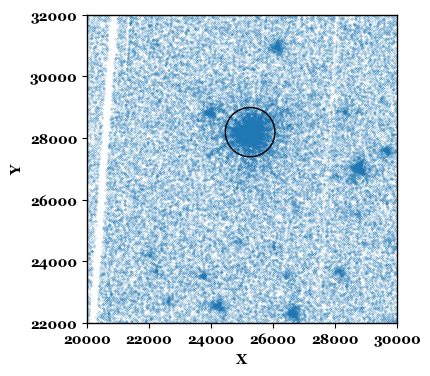

Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS2&&(PATTERN<=12)&&((X,Y) IN circle(25240.35,28123.166,800.0))&&(PI in [200.0:1500])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspec

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS2_S002_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc_soft.lc:STDGTI01,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc_soft.lc:STDGTI02,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc_soft.lc:STDGTI03,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/X

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX02:RAWX and temp_badcol.ds:BADPIX02:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX03:RAWX and temp_badcol.ds:BADPIX03:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX04:RAWX and temp_badcol.ds:BADPIX04:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX05:RAWX and temp_badcol.ds:BADPIX05:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX06:RAWX and temp_badcol.ds:BADPIX06:RAWX is either non-existe

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset on_ancillary.ds.
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:05:28.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:05:28.000
epiclccorr:- Done.
epiclccorr:- Reading ancillary file... spectrum_SUAur_EMOS2_lc_soft.lc
epiclccorr:- Done.
epiclccorr:- Weighted Mean 1.225724674890433574
epiclccorr:- selected 952 rows from the source input table.
epiclccorr:- Closing event file dataset
epiclccorr:- Extraction region lies in CCD number 1
epiclccorr:- Calculating the relative corrections for each CCD...
epiclccorr:- STDGTI01 extension found 
epiclccorr:- Processing GTI extension: STDGTI01 corresponding to CCD 1
epiclccorr:- STDGTI02 extension found 
epiclccorr:- STDGTI03 extension found 
epiclccorr:- STDGTI04 extension found 
epiclccorr:- STDGTI05 ex

epiclccorr::evselect:- selected 952 rows from the input table.
** epiclccorr::evselect: warning (NonStandardSpectrum), The standard PI channel range for MOS is 0-11999. Detector matrices can not be created for this spectrum and spectral fitting will not be possible.
epiclccorr::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:05:30.000
epiclccorr:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:05:30.000
epiclccorr:- Done.
epiclccorr:- Calculating arfgen...
epiclccorr:- Executing (invoked): arfgen spectrumset=spectrum_SUAur_EMOS2_bkg_lc_soft.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes modelquantumef

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:05:33.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:05:33.000
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:05:33.000
epiclccor

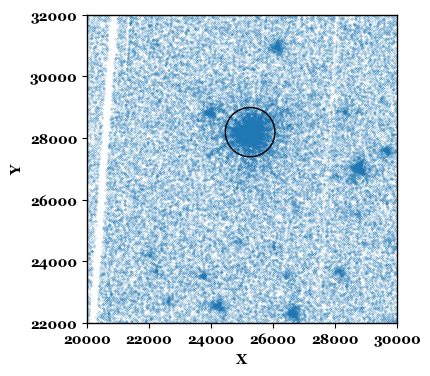

Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS2&&(PATTERN<=12)&&((X,Y) IN circle(25240.35,28123.166,800.0))&&(PI in [1500:10000.0])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withsp

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS2_S002_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc_hard.lc:STDGTI01,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc_hard.lc:STDGTI02,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EMOS2_lc_hard.lc:STDGTI03,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observi

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX02:RAWX and temp_badcol.ds:BADPIX02:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX03:RAWX and temp_badcol.ds:BADPIX03:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX04:RAWX and temp_badcol.ds:BADPIX04:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX05:RAWX and temp_badcol.ds:BADPIX05:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX06:RAWX and temp_badcol.ds:BADPIX06:RAWX is either non-existe

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset on_ancillary.ds.
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:05:49.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:05:49.000
epiclccorr:- Done.
epiclccorr:- Reading ancillary file... spectrum_SUAur_EMOS2_lc_hard.lc
epiclccorr:- Done.
epiclccorr:- Weighted Mean 1.234632874343888798
epiclccorr:- selected 1787 rows from the source input table.
epiclccorr:- Closing event file dataset
epiclccorr:- Extraction region lies in CCD number 1
epiclccorr:- Calculating the relative corrections for each CCD...
epiclccorr:- STDGTI01 extension found 
epiclccorr:- Processing GTI extension: STDGTI01 corresponding to CCD 1
epiclccorr:- STDGTI02 extension found 
epiclccorr:- STDGTI03 extension found 
epiclccorr:- STDGTI04 extension found 
epiclccorr:- STDGTI05 e

epiclccorr::evselect:- selected 1787 rows from the input table.
** epiclccorr::evselect: warning (NonStandardSpectrum), The standard PI channel range for MOS is 0-11999. Detector matrices can not be created for this spectrum and spectral fitting will not be possible.
epiclccorr::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:05:51.000
epiclccorr:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:05:51.000
epiclccorr:- Done.
epiclccorr:- Calculating arfgen...
epiclccorr:- Executing (invoked): arfgen spectrumset=spectrum_SUAur_EMOS2_bkg_lc_hard.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes modelquantume

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:05:54.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:05:54.000
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:05:54.000
epiclccor

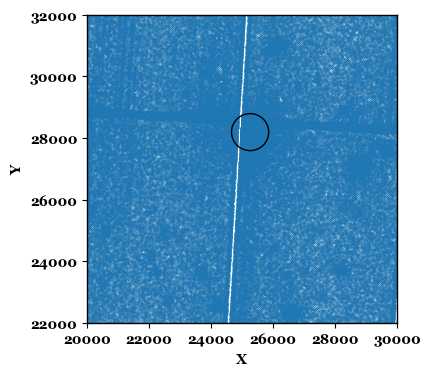

Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN circle(25254.175,28197.344,600.0))&&(PI in [200.0:1500])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspectrums

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( ( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:STDGTI02,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:STDGTI03,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/067196

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( ( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:STDGTI02,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:STDGTI03,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/067196

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( ( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:STDGTI02,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:STDGTI03,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/067196

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( ( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:STDGTI02,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_soft.lc:STDGTI03,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/067196

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- Writing energy data into dataset .. 
epiclccorr::arfgen:- Calculating Area curve ...
epiclccorr::arfgen:- Calculating Area curve ...50.5 2067 15997.5
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:06:39.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:06:39.000
epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~98.17531574 %
epiclccorr::arfg

epiclccorr::arfgen:- Executing (routine): arfgen spectrumset=/var/tmp/tmp.5.s9iYHcspectrum_ccd7.fits rmfset=response.ds withrmfset=no arfset=src_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=no modeleffarea=yes modelquantumeff=yes modelfiltertrans=yes modelcontamination=yes modelee=yes modelootcorr=yes applyxcaladjustment=no applyabsfluxcorr=no eegridfactor=100 withbadpixcorr=yes badpixlocation=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds psfmodel=ELLBETA badpixelresolution=2 withbadpixres=no badpixmaptype=flat setbackscale=yes keeparfset=yes useodfatt=no ignoreoutoffov=yes crossreg_spectrumset='' crossregionarf=no  -w 1 -V 4
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] starte

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX10:RAWX and temp_badcol.ds:BADPIX10:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- Writing energy data into dataset .. 
epiclccorr::arfgen:- Calculating Area curve ...
epiclccorr::arfgen:- Calculating Area curve ...50.5 2067 15997.5
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:06:54.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:06:54.000
epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~99.98445712 %
epiclccorr::arfg

epiclccorr::evselect:- selected 28975 rows from the input table.
** epiclccorr::evselect: warning (NonStandardSpectrum), The standard PI channel range for PN is 0-20479. Detector matrices can not be created for this spectrum and spectral fitting will not be possible.
epiclccorr::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:07:35.000
epiclccorr:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:07:35.000
epiclccorr:- Done.
epiclccorr:- Calculating arfgen...
epiclccorr:- Executing (invoked): arfgen spectrumset=spectrum_SUAur_EPN_lc_soft.lc rmfset=response.ds withrmfset=no arfset=src_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=no modeleffarea=yes modelquantumeff=yes 

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:07:37.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:07:37.000
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:07:37.000
epiclccor

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset on_ancillary.ds.
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:07:42.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:07:42.000
epiclccorr:- Done.
epiclccorr:- Reading ancillary file... spectrum_SUAur_EPN_lc_soft.lc
epiclccorr:- Done.
epiclccorr:- Weighted Mean 1.463600049743425391
epiclccorr:- selected 1585 rows from the source input table.
epiclccorr:- Closing event file dataset
epiclccorr:- Extraction region lies in CCD number 4
epiclccorr:- Calculating the relative corrections for each CCD...
epiclccorr:- STDGTI01 extension found 
epiclccorr:- STDGTI02 extension found 
epiclccorr:- STDGTI03 extension found 
epiclccorr:- STDGTI04 extension found 
epiclccorr:- Processing GTI extension: STDGTI04 corresponding to CCD 4
epiclccorr:- STDGTI05 ext

epiclccorr::evselect:- selected 1585 rows from the input table.
** epiclccorr::evselect: warning (NonStandardSpectrum), The standard PI channel range for PN is 0-20479. Detector matrices can not be created for this spectrum and spectral fitting will not be possible.
epiclccorr::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:08:06.000
epiclccorr:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:08:06.000
epiclccorr:- Done.
epiclccorr:- Calculating arfgen...
epiclccorr:- Executing (invoked): arfgen spectrumset=spectrum_SUAur_EPN_bkg_lc_soft.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes modelquantumeff=

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:08:08.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:08:08.000
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:08:09.000
epiclccor

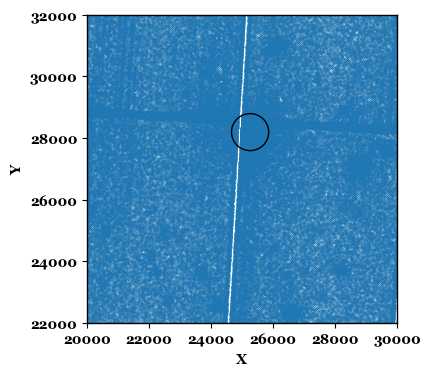

Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN circle(25240.35,28123.166,600.0))&&(PI in [1500:10000.0])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspectrum

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( ( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:STDGTI02,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:STDGTI03,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/06

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( ( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:STDGTI02,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:STDGTI03,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/06

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( ( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:STDGTI02,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:STDGTI03,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/06

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- Writing energy data into dataset .. 
epiclccorr::arfgen:- Calculating Area curve ...
epiclccorr::arfgen:- Calculating Area curve ...50.5 2067 15997.5
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:08:47.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:08:47.000
epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~97.91628487 %
epiclccorr::arfg

epiclccorr::arfgen:- Executing (routine): arfgen spectrumset=/var/tmp/tmp.5.yduRZYspectrum_ccd7.fits rmfset=response.ds withrmfset=no arfset=src_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=no modeleffarea=yes modelquantumeff=yes modelfiltertrans=yes modelcontamination=yes modelee=yes modelootcorr=yes applyxcaladjustment=no applyabsfluxcorr=no eegridfactor=100 withbadpixcorr=yes badpixlocation=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds psfmodel=ELLBETA badpixelresolution=2 withbadpixres=no badpixmaptype=flat setbackscale=yes keeparfset=yes useodfatt=no ignoreoutoffov=yes crossreg_spectrumset='' crossregionarf=no  -w 1 -V 4
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] starte

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:STDGTI02,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_lc_hard.lc:STDGTI03,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX02:RAWX and temp_badcol.ds:BADPIX02:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX03:RAWX and temp_badcol.ds:BADPIX03:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX04:RAWX and temp_badcol.ds:BADPIX04:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX05:RAWX and temp_badcol.ds:BADPIX05:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX06:RAWX and temp_badcol.ds:BADPIX06:RAWX is either non-existe

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~11.50684316 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset src_ancillary.ds.
epiclccorr::arfgen:- Opening spectrumset spectrum_SUAur_EPN_lc_hard.lc...
epiclccorr::arfgen:- Opened spectrumset spectrum_SUAur_EPN_lc_hard.lc...
epiclccorr::arfgen:- Opened table spectrum_SUAur_EPN_lc_hard.lc...
epiclccorr::arfgen:- current backscale value is: 1
epiclccorr::arfgen:- deleted attspectrum_SUAur_EPN_lc_hard.lc...
epiclccorr::arfgen:- Backscale value is: 821948
epiclccorr::arfgen:- added attspectrum_SUAur_EPN_lc_hard.lc...
epiclccorr::arfgen:- closed specspectrum_SUAur_EPN_lc_hard.lc...
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:09:37.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:09:37.000
epiclccorr:- Done.
epiclccorr:- Reading Spectrum... spectrum_SUAur_EPN_lc_hard.lc
epiclccorr:- Reading ancill

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( ( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_bkg_lc_hard.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_bkg_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_bkg_lc_hard.lc:STDGTI02,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_bkg_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_bkg_lc_hard.lc:STDGTI03,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Obs

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( ( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_bkg_lc_hard.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_bkg_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_bkg_lc_hard.lc:STDGTI02,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_bkg_lc_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_bkg_lc_hard.lc:STDGTI03,TIME) && FLAG&0xcfa0000==0 && PATTERN in (:4] && region(/Users/woodml/Obs

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- Writing energy data into dataset .. 
epiclccorr::arfgen:- Calculating Area curve ...
epiclccorr::arfgen:- Calculating Area curve ...50.5 2067 15997.5
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:10:01.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:10:01.000
epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~91.28582803 %
epiclccorr::arfg

epiclccorr:- Events already randomized...
epiclccorr:- closing data set /Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds
epiclccorr:- Exposure Correction Done.
epiclccorr:- Doing Exposure and Dead Time Correction: /Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EXPOSU04
epiclccorr:- Events already randomized...
epiclccorr:- closing data set /Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds
epiclccorr:- Exposure Correction Done.
epiclccorr:- Done.
epiclccorr:- Calculating spectrum...
epiclccorr:- Executing (invoked): evselect table=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EPN_S003_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_bkg_lc_hard.lc:STDGTI01,TIME) && FLAG&0xcfa0000==0

epiclccorr::evselect:- selected 2023 rows from the input table.
** epiclccorr::evselect: warning (NonStandardSpectrum), The standard PI channel range for PN is 0-20479. Detector matrices can not be created for this spectrum and spectral fitting will not be possible.
epiclccorr::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:10:28.000
epiclccorr:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:10:28.000
epiclccorr:- Done.
epiclccorr:- Calculating arfgen...
epiclccorr:- Executing (invoked): arfgen spectrumset=spectrum_SUAur_EPN_bkg_lc_hard.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes modelquantumeff=

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:10:30.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:10:30.000
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:10:30.000
epiclccor

In [51]:
# SU Aur compare soft and hard LC
limit = 1500
# EMOS 1
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Soft
# - - - - - - - - - - -
region_1     = (25260.645, 28188.236)
radius       = 800
bkg_1        = (25260.645, 25000.5)
bkg_radius   = 1800

q_flag       = "#XMMEA_EMOS1" # Quality flag for EPIC pn
n_pattern    = 12             # Pattern selection
pi_min       = 200.           # Low energy range eV
pi_max       = limit          # High energy range eV
time_min     = 445727565.0
time_max     = 445828820.0
lc_bin       = 300         # Lightcurve bin in secs

event_file  = '2232_0671960101_EMOS1_S001_ImagingEvts.ds'
source_file = 'SUAur_EMOS1_lc_soft.lc'
bkg_file    = 'SUAur_EMOS1_bkg_lc_soft.lc'
final_file  = 'SUAur_EMOS1_final_lc_soft.lc'

extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, time_min, time_max, region_1, radius, bkg_1, 
           bkg_radius, work_dir, event_file, source_file, bkg_file, final_file)

# Hard
# - - - - - - - - - - -
pi_min       = limit          # Low energy range eV
pi_max       = 10000.         # High energy range eV
# others same as above

event_file  = '2232_0671960101_EMOS1_S001_ImagingEvts.ds'
source_file = 'SUAur_EMOS1_lc_hard.lc'
bkg_file    = 'SUAur_EMOS1_bkg_lc_hard.lc'
final_file  = 'SUAur_EMOS1_final_lc_hard.lc'

extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, time_min, time_max, region_1, radius, bkg_1, 
           bkg_radius, work_dir, event_file, source_file, bkg_file, final_file)

# EMOS 2
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Soft
# - - - - - - - - - - -
region_2     = (25240.35, 28123.166)
radius       = 800.
bkg_2        = (25240.35, 25000.5) 
bkg_radius   = 1800.

q_flag       = "#XMMEA_EMOS2" # Quality flag for EPIC pn
n_pattern    = 12             # Pattern selection
pi_min       = 200.           # Low energy range eV
pi_max       = limit          # High energy range eV
time_min     = 445727565.0
time_max     = 445828820.0
lc_bin       = 300         # Lightcurve bin in secs

event_file  = '2232_0671960101_EMOS2_S002_ImagingEvts.ds'
source_file = 'SUAur_EMOS2_lc_soft.lc'
bkg_file    = 'SUAur_EMOS2_bkg_lc_soft.lc'
final_file  = 'SUAur_EMOS2_final_lc_soft.lc'

extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, time_min, time_max, region_2, radius, bkg_2, 
           bkg_radius, work_dir, event_file, source_file, bkg_file, final_file)

# Hard
# - - - - - - - - - - -
pi_min       = limit          # Low energy range eV
pi_max       = 10000.         # High energy range eV
# others same as above

event_file  = '2232_0671960101_EMOS2_S002_ImagingEvts.ds'
source_file = 'SUAur_EMOS2_lc_hard.lc'
bkg_file    = 'SUAur_EMOS2_bkg_lc_hard.lc'
final_file  = 'SUAur_EMOS2_final_lc_hard.lc'

extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, time_min, time_max, region_2, radius, bkg_2, 
           bkg_radius, work_dir, event_file, source_file, bkg_file, final_file)

# EPN
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Soft
# - - - - - - - - - - -

region_pn   = (25254.175, 28197.344)
radius      = 600.
bkg_pn      = (26455.5, 26965.5)
bkg_radius  = 800

q_flag       = "#XMMEA_EP" # Quality flag for EPIC pn
n_pattern    = 4             # Pattern selection
pi_min       = 200.           # Low energy range eV
pi_max       = limit          # High energy range eV
time_min     = 445727565.0
time_max     = 445828820.0
lc_bin       = 300         # Lightcurve bin in secs

event_file  = '2232_0671960101_EPN_S003_ImagingEvts.ds'
source_file = 'SUAur_EPN_lc_soft.lc'
bkg_file    = 'SUAur_EPN_bkg_lc_soft.lc'
final_file  = 'SUAur_EPN_final_lc_soft.lc'

extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, time_min, time_max, region_pn, radius, bkg_pn, 
           bkg_radius, work_dir, event_file, source_file, bkg_file, final_file)

# Hard
# - - - - - - - - - - -
pi_min       = limit          # Low energy range eV
pi_max       = 10000.         # High energy range eV
# others same as above

event_file  = '2232_0671960101_EPN_S003_ImagingEvts.ds'
source_file = 'SUAur_EPN_lc_hard.lc'
bkg_file    = 'SUAur_EPN_bkg_lc_hard.lc'
final_file  = 'SUAur_EPN_final_lc_hard.lc'

extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, time_min, time_max, region_2, radius, bkg_2, 
           bkg_radius, work_dir, event_file, source_file, bkg_file, final_file)

In [52]:
# Combine soft and hard LCs for SU Aur from EMOS and PN
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Soft
# - - - - - - - - - - -
combined_file = work_dir + 'SUAur_combined_lc_soft.lc'

# SAS Command
cmd        = "elcbuild" # SAS task to be executed                  

# Arguments of SAS Command
inargs     = [f'sets=SUAur_EMOS1_final_lc_soft.lc SUAur_EMOS2_final_lc_soft.lc SUAur_EPN_final_lc_soft.lc',
             f'outset={combined_file}']

w(cmd, inargs).run()

# Hard 
# - - - - - - - - - - -
combined_file = work_dir+'SUAur_combined_lc_hard.lc'

# SAS Command
cmd        = "elcbuild" # SAS task to be executed                  

# Arguments of SAS Command
inargs     = [f'sets=SUAur_EMOS1_final_lc_hard.lc SUAur_EMOS2_final_lc_hard.lc SUAur_EPN_final_lc_hard.lc',
             f'outset={combined_file}']

w(cmd, inargs).run()

Executing: 
elcbuild sets='SUAur_EMOS1_final_lc_soft.lc SUAur_EMOS2_final_lc_soft.lc SUAur_EPN_final_lc_soft.lc' outset='/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_combined_lc_soft.lc' 
elcbuild:- Executing (routine): elcbuild sets='SUAur_EMOS1_final_lc_soft.lc SUAur_EMOS2_final_lc_soft.lc SUAur_EPN_final_lc_soft.lc' outset=/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_combined_lc_soft.lc  -w 1 -V 4
elcbuild:- elcbuild (elcbuild-1.10)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T20:16:03.000
elcbuild:- elcbuild (elcbuild-1.10)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T20:16:03.000
Executing: 
elcbuild sets='SUAur_EMOS1_final_lc_hard.lc SUAur_EMOS2_final_lc_hard.lc SUAur_EPN_final_lc_hard.lc' outset='/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_combined_lc_hard.lc' 
elcbuild:- Executing (routine): elcbuild sets='SUAur_EMOS1_final_lc_hard.lc SUAur_EMOS2_final_lc_hard.lc SUAur_EPN_final_lc_hard.lc' outset=/Users/woodml/Observing/XMM-Newton/0671960101

Filename: SUAur_combined_lc_soft.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  RATE          1 BinTableHDU     81   338R x 5C   [3E, 3E, 3E, 3E, 3E]   
Filename: SUAur_combined_lc_hard.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  RATE          1 BinTableHDU     81   338R x 5C   [3E, 3E, 3E, 3E, 3E]   


/Users/woodml/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


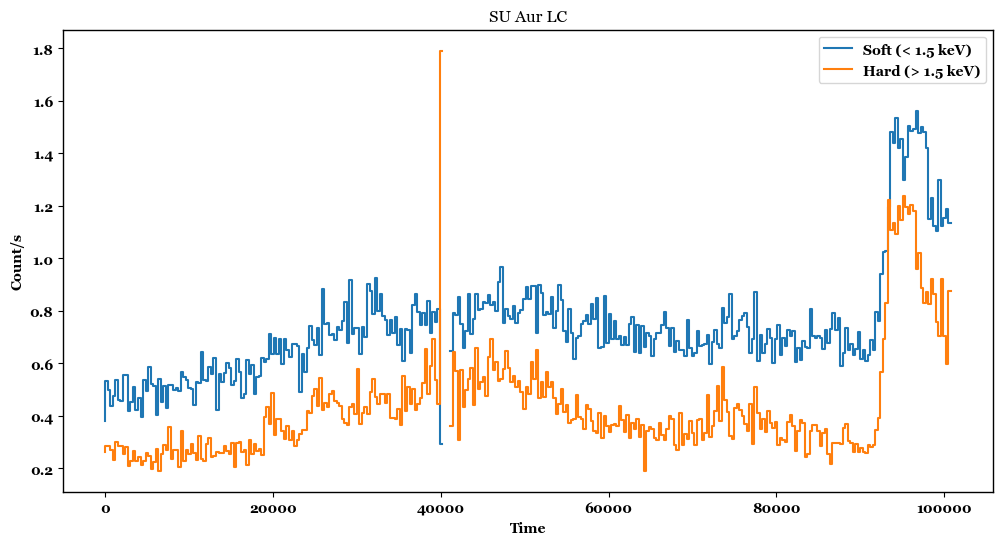

In [55]:
# Plot combined LC
hdul = fits.open('SUAur_combined_lc_soft.lc')
hdul.info()
lc_soft = Table(hdul[1].data)
x_soft = np.arange(hdul[1].header['TSTART'], hdul[1].header['TSTOP'], hdul[1].header['TIMEDEL'])-hdul[1].header['TSTART']


hdul = fits.open('SUAur_combined_lc_hard.lc')
hdul.info()
lc_hard = Table(hdul[1].data)
x_hard = np.arange(hdul[1].header['TSTART'], hdul[1].header['TSTOP'], hdul[1].header['TIMEDEL'])-hdul[1].header['TSTART']


plt.figure(figsize=(12,6))
plt.step(x_soft, np.sum(lc_soft['RATE'], 1), label='Soft (< 1.5 keV)')
plt.step(x_hard, np.sum(lc_hard['RATE'], 1), label='Hard (> 1.5 keV)')
plt.xlabel('Time')
plt.ylabel('Count/s')
plt.legend()
plt.title('SU Aur LC')
plt.savefig('SUAur_combined_softhard_LC.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

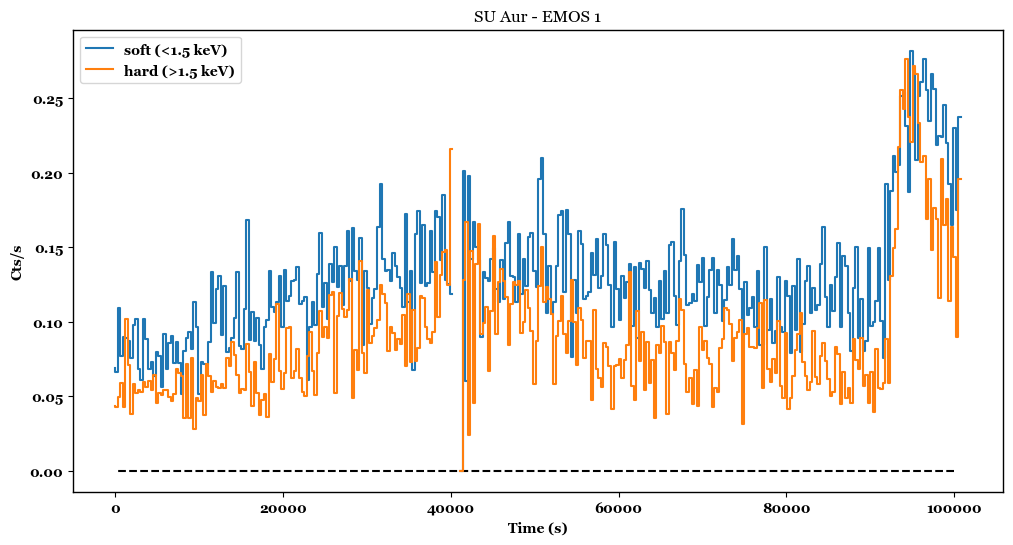

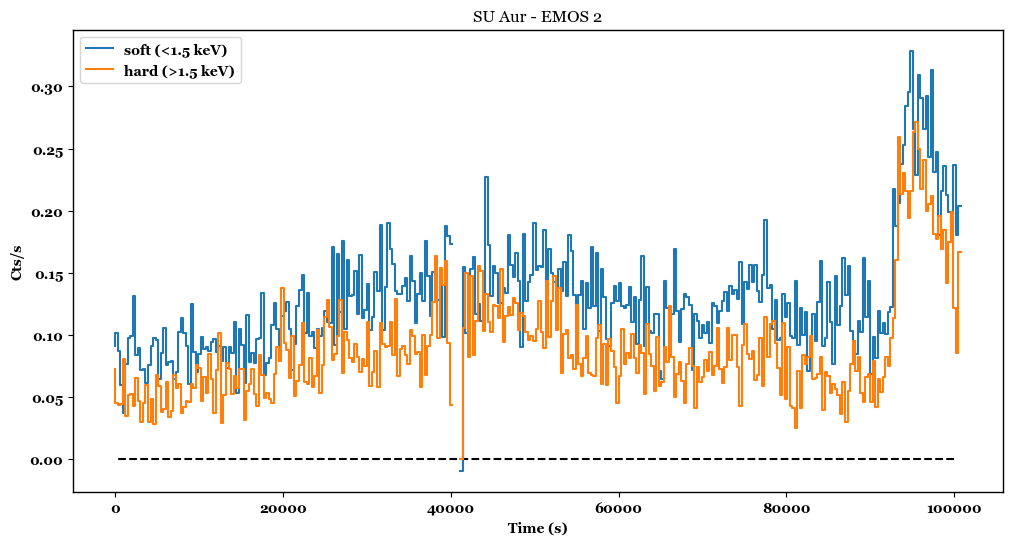

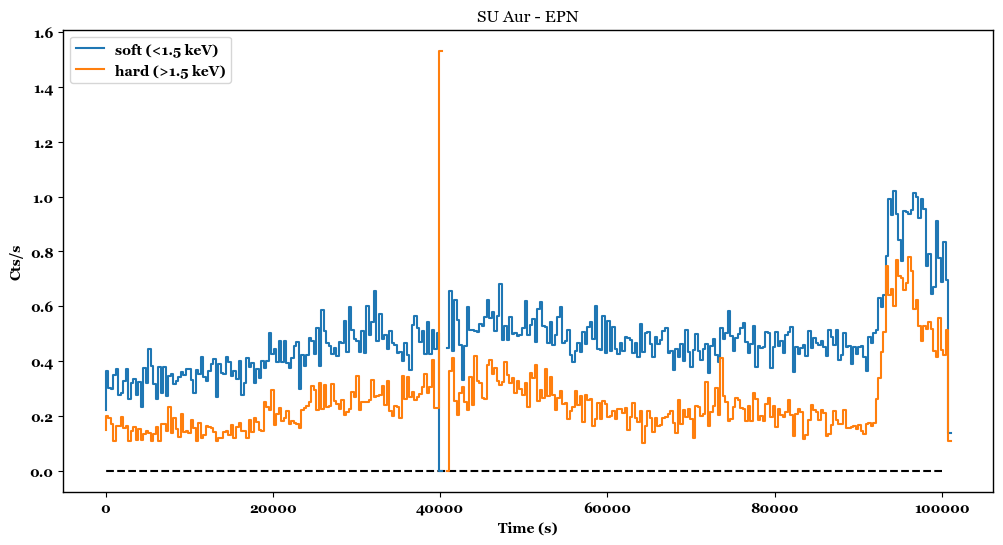

In [56]:
# PLOT
plt.figure(figsize=(12,6))  # Size of figure
plotLC(plt, 'SUAur_EMOS1_final_lc_soft.lc', label='soft (<1.5 keV)')
plotLC(plt, 'SUAur_EMOS1_final_lc_hard.lc', label='hard (>1.5 keV)')
plt.hlines(0,100000, 0, 'k','--', zorder=0)
plt.title('SU Aur - EMOS 1')
plt.legend(loc='upper left')
plt.show()

# PLOT
plt.figure(figsize=(12,6))  # Size of figure
plotLC(plt, 'SUAur_EMOS2_final_lc_soft.lc', label='soft (<1.5 keV)')
plotLC(plt, 'SUAur_EMOS2_final_lc_hard.lc', label='hard (>1.5 keV)')
plt.hlines(0,100000, 0, 'k','--', zorder=0)
plt.title('SU Aur - EMOS 2')
plt.legend(loc='upper left')
plt.show()

# PLOT
plt.figure(figsize=(12,6))  # Size of figure
plotLC(plt, 'SUAur_EPN_final_lc_soft.lc', label='soft (<1.5 keV)')
plotLC(plt, 'SUAur_EPN_final_lc_hard.lc', label='hard (>1.5 keV)')
plt.hlines(0,100000, 0, 'k','--', zorder=0)
plt.title('SU Aur - EPN')
plt.legend(loc='upper left')
plt.show()

# Spectra

Extract three spectra:
1. Full Spectrum
2. Flare Spectrum
3. Quiet Spectum

## Full

In [5]:
# SU Aur - EMOS 1

# Parameters
q_flag       = "#XMMEA_EMOS1" # Quality flag
n_pattern    = 12           # Pattern selection. Should be 12 for MOS detectors
x_SUAur_1    = 25260.645    # x position of source
y_SUAur_1    = 28188.236    # y position of source
bkg_region   = (25260.645, 25000.5)
radius       = 800         # extraction region radius for source
bkg_radius   = 1800          # difference to outer radius of annular background extraction region
spec_min     = 0
spec_max     = 11999
bin_size     = 15

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/'
event_file         = '2232_0671960101_EMOS1_S001_ImagingEvts.ds'
# Output Files
source_file        = 'EMOS1_spec.fits'
bkg_file           = 'EMOS1_bkg_spec.fits'
response_file      = 'EMOS1.rmf'
ancillary_file     = 'EMOS1.anc'
final_file         = 'EMOS1_spec_final.fits'

# Extract
extract_spectrum(q_flag, n_pattern, bin_size, (x_SUAur_1, y_SUAur_1), radius, bkg_region, bkg_radius, spec_min, spec_max,
                 work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file)



Checking for Event Files...


File 2232_0671960101_EMOS1_S001_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='2232_0671960101_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12) && ((X,Y) IN circle(25260.645,28188.236,800))' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialc

In [7]:
# EMOS 2

# Parameters
q_flag       = "#XMMEA_EMOS2" # Quality flag
n_pattern    = 12           # Pattern selection. Should be 12 for MOS detectors
x_SUAur_2    = 25240.35    # x position of source
y_SUAur_2    = 28123.166    # y position of source
radius       = 800         # extraction region radius for source
bkg_region   = (25240.35, 25000.5) 
bkg_radius   = 1800          # difference to outer radius of annular background extraction region
spec_min     = 0
spec_max     = 11999
bin_size     = 15

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/'
event_file         = '2232_0671960101_EMOS2_S002_ImagingEvts.ds'
# Output Files
source_file        = 'EMOS2_spec.fits'
bkg_file           = 'EMOS2_bkg_spec.fits'
response_file      = 'EMOS2.rmf'
ancillary_file     = 'EMOS2.anc'
final_file         = 'EMOS2_spec_final.fits'

extract_spectrum(q_flag, n_pattern, bin_size, (x_SUAur_2, y_SUAur_2), radius, bkg_region, bkg_radius,spec_min,
                 spec_max, work_dir, event_file, source_file,bkg_file,response_file,ancillary_file, final_file)



Checking for Event Files...


File 2232_0671960101_EMOS2_S002_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='2232_0671960101_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS2&&(PATTERN<=12) && ((X,Y) IN circle(25240.35,28123.166,800))' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialce

backscale::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
backscale::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T21:16:26.000
backscale::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T21:16:27.000
Making file temp_badcol.ds
backscale::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
backscale::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX02:RAWX and temp_badcol.ds:BADPIX02:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
backscale::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX03:RAWX and temp_badcol.

rmfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
rmfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T21:16:35.000
rmfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T21:16:35.000
rmfgen:-  RmfDataServer created ok.
rmfgen:- Opening data set ...
rmfgen:- Opened data set.
rmfgen:- Adding MATRIX table. There will be 2400 rows in table 
rmfgen:- Initialising table iterator ..
rmfgen:- Populating table ..
rmfgen:- No groups found for row 0 Will fill F_CHAN, N_CHAN and MATRIX columns with zeroes 
rmfgen:- No groups found for row 1 Will fill F_CHAN, N_CHAN and MATRIX columns with zeroes 
rmfgen:- No groups found for row 2 Will fill F_CHAN, N_CHAN and MATRIX column

arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T21:17:04.000
arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-11T21:17:04.000
arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-11T21:17:04.000
arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:

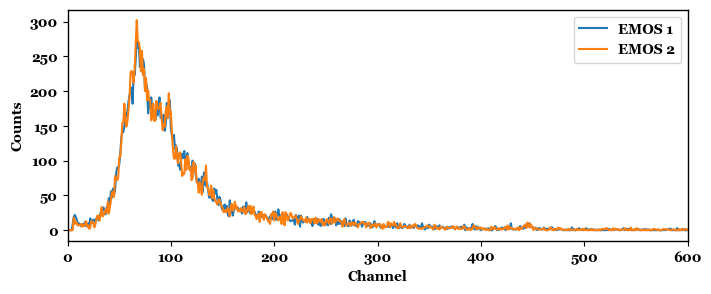

In [8]:
plt.figure(figsize=(8,3))
plot_spectrum('EMOS1_spec_final.fits', label='EMOS 1')
plot_spectrum('EMOS2_spec_final.fits', label='EMOS 2')
plt.legend(loc='upper right')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.xlim(0,600)
plt.show()

In [9]:
# EPN

# Parameters
q_flag       = "#XMMEA_EP"             # Quality flag
n_pattern    = 4                        # Pattern selection. Should be 12 for MOS detectors
SUAur_region = (25254.175, 28197.344)   # position of source
radius       = 600                      # radius of source extraction region
bkg_region   = (26455.5, 26965.5)       # position of background extraction region
bkg_radius   = 800                      # radius of background extraction region
spec_min     = 0
spec_max     = 20479
bin_size     = 5

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/'
event_file         = '2232_0671960101_EPN_S003_ImagingEvts.ds'
# Output Files
source_file        = 'EPN_spec.fits'
bkg_file           = 'EPN_bkg_spec.fits'
response_file      = 'EPN.rmf'
ancillary_file     = 'EPN.anc'
final_file         = 'EPN_spec_final.fits'

# Extract
extract_spectrum(q_flag, n_pattern, bin_size, SUAur_region, radius, bkg_region, bkg_radius, spec_min, spec_max,
                 work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file)



Checking for Event Files...


File 2232_0671960101_EPN_S003_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='2232_0671960101_EPN_S003_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EP&&(PATTERN<=4) && ((X,Y) IN circle(25254.175,28197.344,600))' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='n

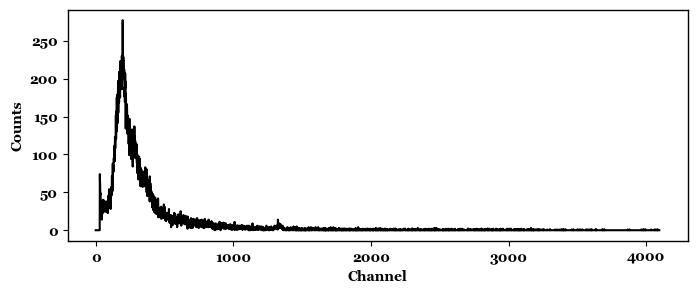

rmfgen:- Executing (routine): rmfgen rmfset=/Users/woodml/Observing/XMM-Newton/0671960101/EPIC_PN.rmf threshold=1e-06 withenergybins=no energymin=0 energymax=15 nenergybins=30 spectrumset=/Users/woodml/Observing/XMM-Newton/0671960101/SUAur_EPN_spec.fits format=var detmaptype=psf detmaparray=detmapfile.ds: withdetbounds=no detxoffset=1200 detyoffset=1200 detxbins=160 detybins=160 withdetbins=yes raweventfile=rawevents.ds correctforpileup=no filterdss=yes withfilteredset=no filteredset=filteredpixellist.ds withrmfset=no psfenergy=2 withsourcepos=no sourcecoords=eqpos sourcex=0 sourcey=0 extendedsource=no modeleffarea=no modelquantumeff=no modelfiltertrans=no modelcontamination=no modelee=yes modelootcorr=no eegridfactor=100 withbadpixcorr=no badpixlocation=notSpecified setbackscale=no keeparfset=yes useodfatt=no ignoreoutoffov=yes crossreg_spectrumset='' crossregionarf=no psfmodel=notSpecified badpixelresolution=2 withbadpixres=no applyxcaladjustment=no acceptchanrange=no applyabsfluxcor

arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-19T16:19:06.000
arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2023-12-19T16:19:06.000
arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.986917 fixeddec=30.535611 fixedposangle=266.395294 attitudelabel=fixed nominalra=73.986917 nominaldec=30.535611 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2023-12-19T16:19:06.000
arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:

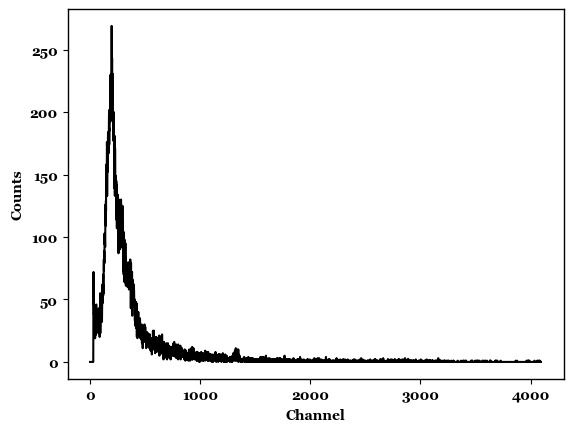

In [10]:
# Plot
plt.figure(figsize=(8,3))
plot_spectrum('EPN_spec_final.fits', c='k')
plt.xlabel('Channel')
plt.ylabel('Counts')
# plt.xlim(0,400)
plt.show()

## Flare

/Users/woodml/anaconda3/envs/Observing/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


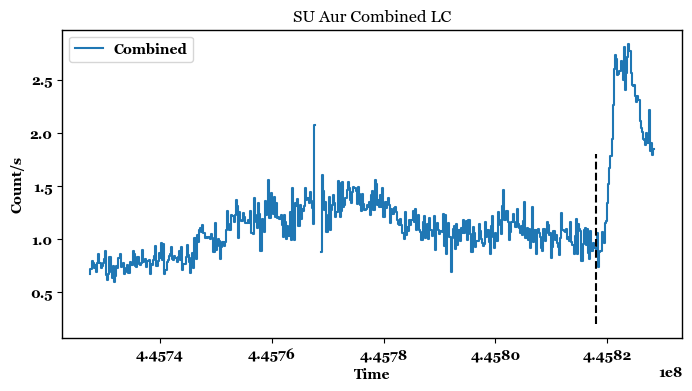

In [11]:
# Plot combined LC
hdul = fits.open('SUAur_combined_lc.lc')
lc = Table(hdul[1].data)

x = np.arange(hdul[1].header['TSTART'], hdul[1].header['TSTOP'], hdul[1].header['TIMEDEL'])

plt.figure(figsize=(8,4))
plt.step(x, np.sum(lc['RATE'], 1), label='Combined')
plt.xlabel('Time')
plt.ylabel('Count/s')
plt.legend()
plt.title('SU Aur Combined LC')
plt.vlines(445818000, 0.2, 1.8, 'k', '--')
plt.show()

In [4]:
t_flare = 445818000

In [15]:
# EMOS 1

# Parameters
q_flag          = "#XMMEA_EMOS1"
n_pattern       = 12
region_1        = (25260.645, 28188.236)
radius          = 800
bkg_1           = (25260.645, 25000.5)
bkg_radius      = 1800
spec_min        = 0
spec_max        = 11999
bin_size        = 15
time_min        = t_flare
time_max        = 445828820.0

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/'
event_file         = '2232_0671960101_EMOS1_S001_ImagingEvts.ds'
# Output Files
source_file        = 'EMOS1_spec_flare.fits'
bkg_file           = 'EMOS1_bkg_spec_flare.fits'
response_file      = 'EMOS1_flare.rmf'
ancillary_file     = 'EMOS1_flare.anc'
final_file         = 'EMOS1_spec_flare_final.fits'

# Extract
extract_spectrum(q_flag, n_pattern, bin_size, region_1, radius, bkg_1, bkg_radius, spec_min, spec_max,
                 work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file,
                 time_min=time_min, time_max=time_max)



Checking for Event Files...


File 2232_0671960101_EMOS1_S001_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='2232_0671960101_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12) && ((X,Y) IN circle(25260.645,28188.236,800)) && (445818000 < TIME) && (TIME < 445828820.0)' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatat

In [17]:
# EMOS 2

# Parameters
q_flag       = "#XMMEA_EMOS1"
n_pattern    = 12
region_2     = (25240.35, 28123.166)
radius       = 800.
bkg_2        = (25240.35, 25000.5) 
bkg_radius   = 1800.
spec_min     = 0
spec_max     = 11999
bin_size     = 15
time_min     = t_flare
time_max     = 445828820.0

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/'
event_file         = '2232_0671960101_EMOS2_S002_ImagingEvts.ds'
# Output Files
source_file        = 'EMOS2_spec_flare.fits'
bkg_file           = 'EMOS2_bkg_spec_flare.fits'
response_file      = 'EMOS2_flare.rmf'
ancillary_file     = 'EMOS2_flare.anc'
final_file         = 'EMOS2_spec_flare_final.fits'

# Extract
extract_spectrum(q_flag, n_pattern, bin_size, SUAur_region_1, radius, bkg_1, bkg_radius, spec_min, spec_max,
                 work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file,
                 time_min=time_min, time_max=time_max)



Checking for Event Files...


File 2232_0671960101_EMOS2_S002_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='2232_0671960101_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12) && ((X,Y) IN circle(25260.645,28188.236,800.0)) && (445818000 < TIME) && (TIME < 445828820.0)' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedat

In [5]:
# EPN

# Parameters

q_flag          = "#XMMEA_EP" # Quality flag for EPIC pn
n_pattern       = 4           # Pattern selection
region_pn       = (25254.175, 28197.344)
radius          = 600.
bkg_pn          = (26455.5, 26965.5)
bkg_radius      = 800
spec_min        = 0
spec_max        = 20479
bin_size        = 1
time_min        = t_flare
time_max        = 445828820.0

# Input Files
work_dir        = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/'
event_file      = '2232_0671960101_EPN_S003_ImagingEvts.ds'
# Output Files
source_file     = 'EPN_spec_flare.fits'
bkg_file        = 'EPN_bkg_spec_flare.fits'
response_file   = 'EPN_flare.rmf'
ancillary_file  = 'EPN_flare.anc'
final_file      = 'EPN_spec_flare_final.fits'

# Extract
extract_spectrum(q_flag, n_pattern, bin_size, region_pn, radius, bkg_pn, bkg_radius, spec_min, spec_max,
                 work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file,
                 time_min=time_min, time_max=time_max)



Checking for Event Files...


File 2232_0671960101_EPN_S003_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='2232_0671960101_EPN_S003_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EP&&(PATTERN<=4) && ((X,Y) IN circle(25254.175,28197.344,600.0)) && (445818000 < TIME) && (TIME < 445828820.0)' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='n

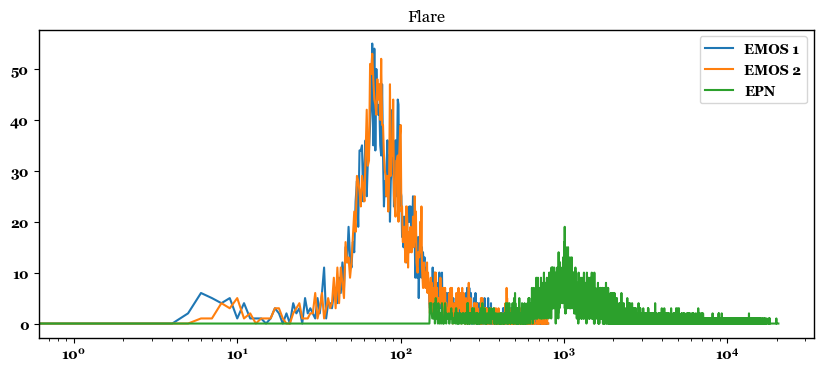

In [7]:
# Plot
plt.figure(figsize=(10,4))  # Size of figure
plot_spectrum('EMOS1_spec_flare_final.fits', label='EMOS 1')
plot_spectrum('EMOS2_spec_flare_final.fits', label='EMOS 2')
plot_spectrum('EPN_spec_flare_final.fits', label='EPN')
plt.title('Flare')
plt.legend(loc='upper right')
plt.xscale('log')
plt.show()

## Quiet

In [8]:
# EMOS 1

# Parameters
q_flag          = "#XMMEA_EMOS1"
n_pattern       = 12
region_1        = (25260.645, 28188.236)
radius          = 800
bkg_1           = (25260.645, 25000.5)
bkg_radius      = 1800
spec_min        = 0
spec_max        = 11999
bin_size        = 15
time_min        = 445727565.0
time_max        = t_flare

# Input Files
work_dir        = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/'
event_file      = '2232_0671960101_EMOS1_S001_ImagingEvts.ds'
# Output Files
source_file     = 'EMOS1_spec_quiet.fits'
bkg_file        = 'EMOS1_bkg_spec_quiet.fits'
response_file   = 'EMOS1_quiet.rmf'
ancillary_file  = 'EMOS1_quiet.anc'
final_file      = 'EMOS1_spec_quiet_final.fits'

# Extract
extract_spectrum(q_flag, n_pattern, bin_size, region_1, radius, bkg_1, bkg_radius, spec_min, spec_max,
                 work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file,
                 time_min=time_min, time_max=time_max)



Checking for Event Files...


File 2232_0671960101_EMOS1_S001_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='2232_0671960101_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12) && ((X,Y) IN circle(25260.645,28188.236,800)) && (445727565.0 < TIME) && (TIME < 445818000)' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatat

In [10]:
# EMOS 2

# Parameters
q_flag          = "#XMMEA_EMOS2"
n_pattern       = 12
region_2        = (25240.35, 28123.166)
radius          = 800.
bkg_2           = (25240.35, 25000.5) 
bkg_radius      = 1800.
spec_min        = 0
spec_max        = 11999
bin_size        = 15
time_min        = 445727565.0
time_max        = t_flare

# Input Files
work_dir        = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0671960101/'
event_file      = '2232_0671960101_EMOS2_S002_ImagingEvts.ds'
# Output Files
source_file     = 'EMOS2_spec_quiet.fits'
bkg_file        = 'EMOS2_bkg_spec_quiet.fits'
response_file   = 'EMOS2_quiet.rmf'
ancillary_file  = 'EMOS2_quiet.anc'
final_file      = 'EMOS2_spec_quiet_final.fits'

# Extract
extract_spectrum(q_flag, n_pattern, bin_size, region_2, radius, bkg_2, bkg_radius, spec_min, spec_max,
                 work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file,
                 time_min=time_min, time_max=time_max)



Checking for Event Files...


File 2232_0671960101_EMOS2_S002_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='2232_0671960101_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS2&&(PATTERN<=12) && ((X,Y) IN circle(25240.35,28123.166,800.0)) && (445727565.0 < TIME) && (TIME < 445818000)' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedata

In [14]:
# EPN

# Parameters
q_flag          = "#XMMEA_EP"
n_pattern       = 4
region_pn       = (25254.175, 28197.344)
radius          = 600.
bkg_pn          = (26455.5, 26965.5)
bkg_radius      = 800
spec_min        = 0
spec_max        = 20479
bin_size        = 1
time_min        = 445727565.0
time_max        = t_flare

# Input Files
event_file      = '2232_0671960101_EPN_S003_ImagingEvts.ds'
# Output Files
source_file     = 'EPN_spec_quiet.fits'
bkg_file        = 'EPN_bkg_spec_quiet.fits'
response_file   = 'EPN_quiet.rmf'
ancillary_file  = 'EPN_quiet.anc'
final_file      = 'EPN_spec_quiet_final.fits'

# Extract
extract_spectrum(q_flag, n_pattern, bin_size, region_pn, radius, bkg_pn, bkg_radius, spec_min, spec_max,
                 work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file,
                 time_min=time_min, time_max=time_max)



Checking for Event Files...


File 2232_0671960101_EPN_S003_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='2232_0671960101_EPN_S003_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EP&&(PATTERN<=4) && ((X,Y) IN circle(25254.175,28197.344,600.0)) && (445727565.0 < TIME) && (TIME < 445818000)' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='n

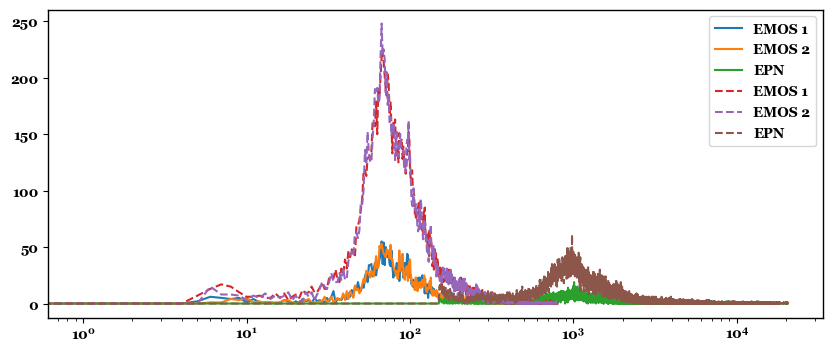

In [13]:
# Plot
plt.figure(figsize=(10,4))  # Size of figure
plot_spectrum('EMOS1_spec_flare_final.fits', label='EMOS 1')
plot_spectrum('EMOS2_spec_flare_final.fits', label='EMOS 2')
plot_spectrum('EPN_spec_flare_final.fits', label='EPN')
plot_spectrum('EMOS1_spec_quiet_final.fits', ls='--', label='EMOS 1')
plot_spectrum('EMOS2_spec_quiet_final.fits', ls='--', label='EMOS 2')
plot_spectrum('EPN_spec_quiet_final.fits', ls='--', label='EPN')
plt.legend(loc='upper right')
plt.xscale('log')
plt.show()

# OM Extraction

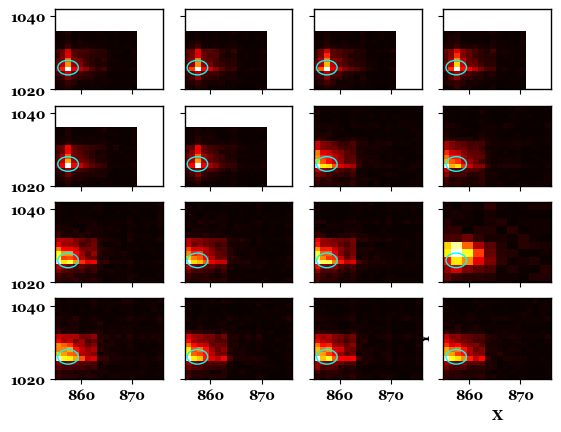

In [4]:
# SU Aur
# Check out images
files = ['F0671960101OMS006EVLIST0000.FIT','F0671960101OMS007EVLIST0000.FIT','F0671960101OMS008EVLIST0000.FIT',
         'F0671960101OMS009EVLIST0000.FIT','F0671960101OMS010EVLIST0000.FIT','F0671960101OMS011EVLIST0000.FIT',
         'F0671960101OMS015EVLIST0000.FIT','F0671960101OMS016EVLIST0000.FIT','F0671960101OMS017EVLIST0000.FIT',
         'F0671960101OMS018EVLIST0000.FIT','F0671960101OMS019EVLIST0000.FIT','F0671960101OMS020EVLIST0000.FIT',
         'F0671960101OMS021EVLIST0000.FIT','F0671960101OMS024EVLIST0000.FIT','F0671960101OMS025EVLIST0000.FIT',
         'F0671960101OMS026EVLIST0000.FIT']

_, ax = plt.subplots(nrows=4, ncols=4, sharex='all', sharey='all')
ax = np.concatenate(ax)

for i in range(len(files)):
    hdul = fits.open(files[i])
    
    events = Table(hdul[1].data)

    hdr = hdul[0].header

    region = (857.5, 1026)
    radius = 2
    
    ax[i].hist2d(events['CORR_X'], events['CORR_Y'], bins=18, cmap='hot')
    p = plt.Circle(region, radius, edgecolor='cyan', fill=False, zorder=1)
    ax[i].add_artist(p)

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

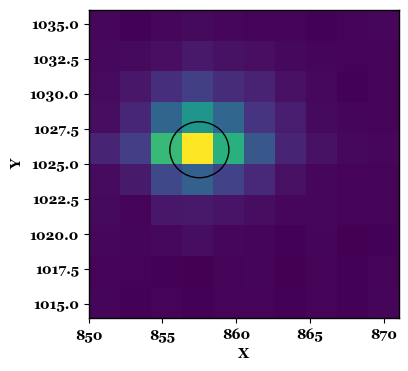

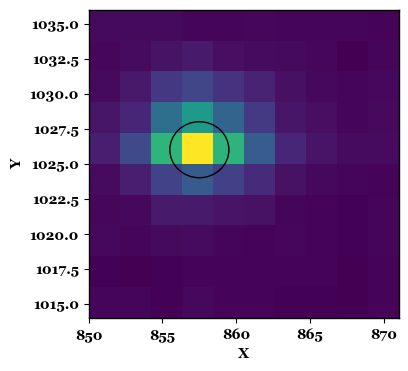

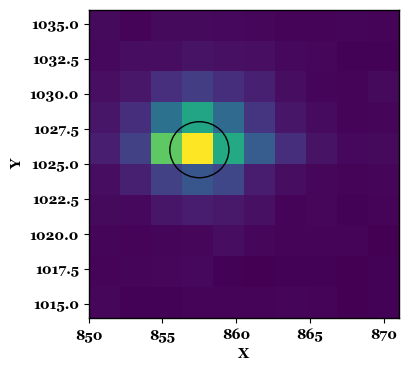

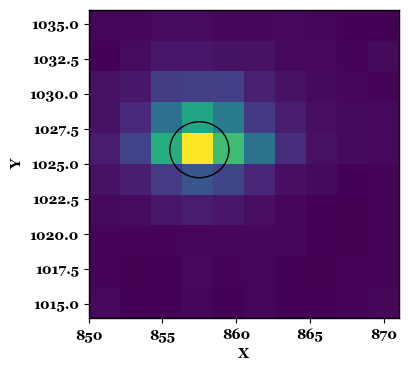

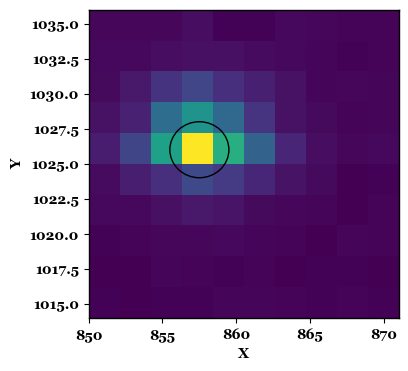

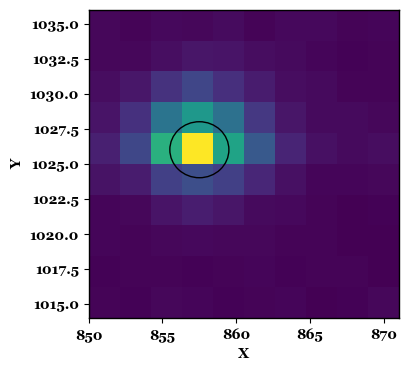

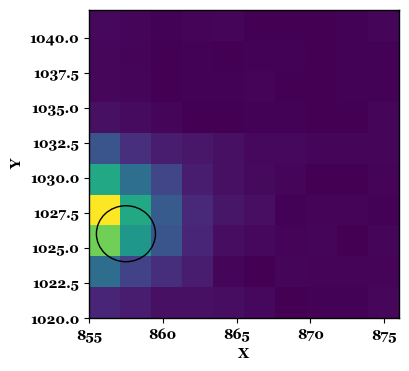

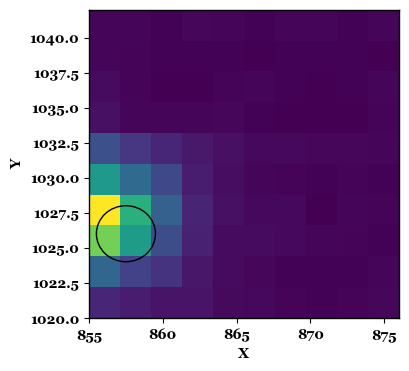

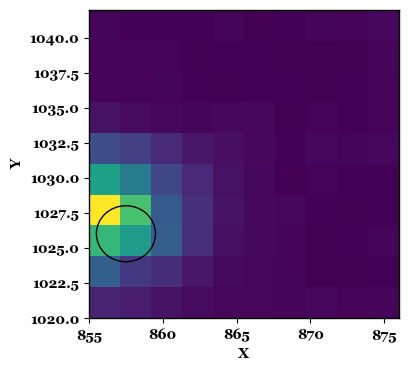

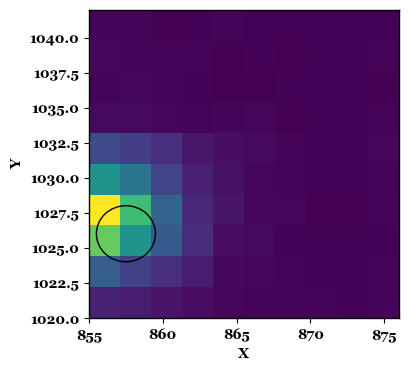

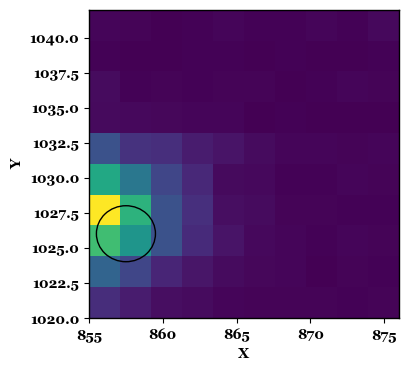

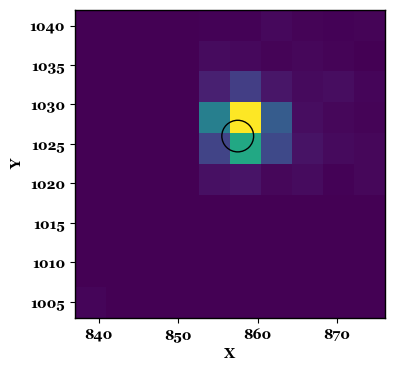

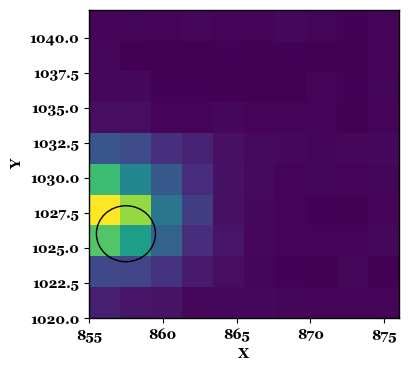

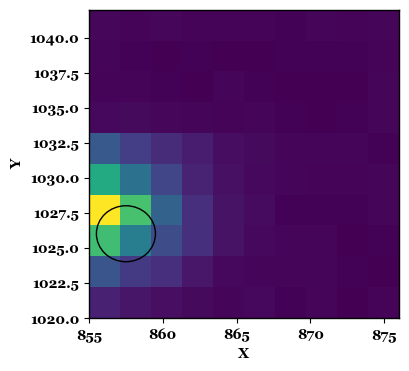

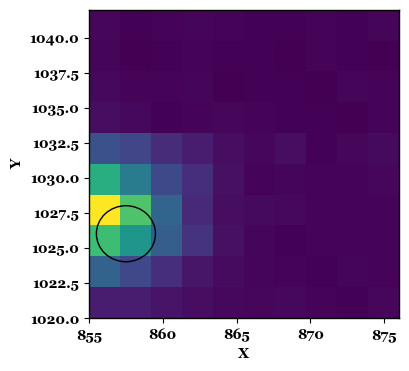

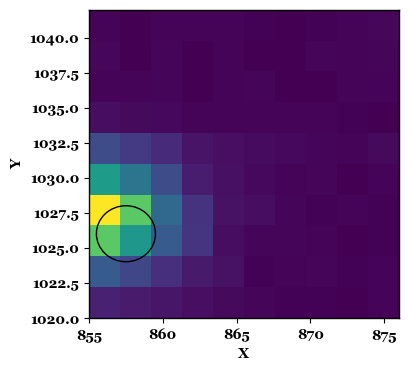

In [2]:
# SU Aur
# Extract
region = (857.5, 1026)
radius = 2

for i in range(len(files)):
    plot_region_om(region, radius, files[i])

In [101]:
print(events.colnames)
print(events['FRAME','CORR_X','CORR_Y','TIME','PHA','BADPIX'])

['FRAME', 'FTCOARSE', 'FTFINE', 'PHA', 'RAWX', 'RAWY', 'TIME', 'CORR_X', 'CORR_Y', 'WIN_FLAG', 'FACTOR', 'BADPIX']
FRAME CORR_X CORR_Y        TIME       PHA BADPIX
----- ------ ------ ----------------- --- ------
    2    861   1028 445778669.8568516   1      0
    3    860   1027 445778670.3568516   1      0
    3    861   1030 445778670.3568516   1      0
    6    858   1025 445778671.8568516   1      0
    7    858   1025 445778672.3568516   1      0
    7    869   1035 445778672.3568516   1      0
    8    855   1026 445778672.8568516   1      0
  ...    ...    ...               ... ...    ...
 4391    856   1030 445780864.3568516   1      0
 4391    876   1031 445780864.3568516   1      0
 4393    855   1030 445780865.3568516   1      0
 4396    857   1026 445780866.8568516   1      0
 4396    857   1029 445780866.8568516   1      0
 4397    862   1029 445780867.3568516   1      0
 4400    856   1024 445780868.8568516   1      0
Length = 4958 rows


2012-02-15T21:34:22.000
[1235:1256, 920: 942]
73.9870708568268 30.5357829663774
2012-02-15T22:16:10.000
[1235:1256, 920: 942]
73.9870492390475 30.5357575108135
2012-02-15T23:27:57.000
[1235:1256, 920: 942]
73.9870199539303 30.5357265337972
2012-02-16T00:09:45.000
[1235:1256, 920: 942]
73.9870081371799 30.5357067726091
2012-02-16T00:51:30.000
[1235:1256, 920: 942]
73.9869933335686 30.5356913010306
2012-02-16T01:33:18.000
[1235:1256, 920: 942]
73.9869775476379 30.5356727968017
2012-02-16T04:20:27.000
[1240:1261, 926: 948]
73.9869326121795 30.5356206401482
2012-02-16T05:02:14.000
[1240:1261, 926: 948]
73.9869225450745 30.5356092484392
2012-02-16T05:44:00.000
[1240:1261, 926: 948]
73.986912390301 30.5355965164766
2012-02-16T06:25:47.000
[1240:1261, 926: 948]
73.9869016134647 30.5355904354919
2012-02-16T07:07:34.000
[1240:1261, 926: 948]
73.9868955627668 30.5355842638881
2012-02-16T09:57:12.000
[1240:1261, 926: 948]
73.9868811740437 30.5355482566178
2012-02-16T10:36:28.000
[1240:1261, 926: 

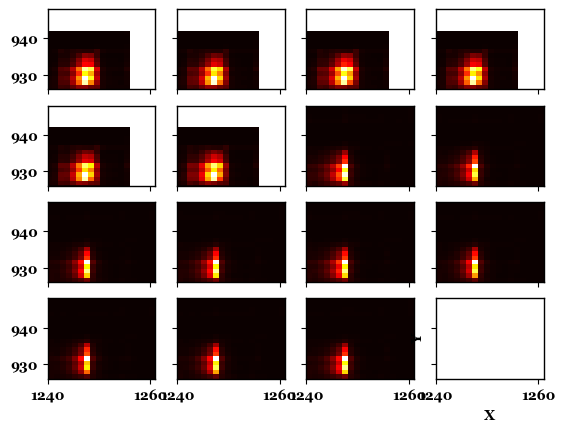

In [70]:
# SU Aur
files = ['F0671960101OMS006EVLIST2000.FIT','F0671960101OMS007EVLIST2000.FIT','F0671960101OMS008EVLIST2000.FIT',
         'F0671960101OMS009EVLIST2000.FIT','F0671960101OMS010EVLIST2000.FIT','F0671960101OMS011EVLIST2000.FIT',
         'F0671960101OMS015EVLIST2000.FIT','F0671960101OMS016EVLIST2000.FIT','F0671960101OMS017EVLIST2000.FIT',
         'F0671960101OMS018EVLIST2000.FIT','F0671960101OMS019EVLIST2000.FIT',
         'F0671960101OMS021EVLIST2000.FIT','F0671960101OMS024EVLIST2000.FIT','F0671960101OMS025EVLIST2000.FIT',
         'F0671960101OMS026EVLIST2000.FIT']

_, ax = plt.subplots(nrows=4, ncols=4, sharex='all', sharey='all')
ax = np.concatenate(ax)

for i in range(len(files)):
    hdul = fits.open(files[i])
    
    events = Table(hdul[1].data)

    hdr = hdul[0].header
    print(hdr['DATE-END'])
    print(hdr['DETSEC'])
    print(hdr['RA_SCX'],hdr['DEC_SCX'])
    
    region = (857.5, 1026)
    radius = 2
    
    ax[i].hist2d(events['CORR_X'], events['CORR_Y'], bins=18, cmap='hot')
    p = plt.Circle(region, radius, edgecolor='cyan', fill=False, zorder=1)
    ax[i].add_artist(p)

# plt.xlim(850, 871)
# plt.ylim(1014, 1036)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Combining OM Data
https://www.cosmos.esa.int/web/xmm-newton/sas-thread-om-time-series

In [17]:
# SU Aur
files = glob.glob('P*OM*TIMESR0000.FIT')
print(files)

# First, apply barycentric correction to times
# barycen table={file}:RATE 
for file in files[2:]:
    cmd = "barycen"                

    # Arguments of SAS Command
    inargs = [f'table={file}:RATE'] 
    print(inargs)

    w(cmd, inargs).run()

['P0671960101OMS024TIMESR0000.FIT', 'P0671960101OMS019TIMESR0000.FIT', 'P0671960101OMS020TIMESR0000.FIT', 'P0671960101OMS009TIMESR0000.FIT', 'P0671960101OMS010TIMESR0000.FIT', 'P0671960101OMS007TIMESR0000.FIT', 'P0671960101OMS017TIMESR0000.FIT', 'P0671960101OMS016TIMESR0000.FIT', 'P0671960101OMS015TIMESR0000.FIT', 'P0671960101OMS006TIMESR0000.FIT', 'P0671960101OMS011TIMESR0000.FIT', 'P0671960101OMS026TIMESR0000.FIT', 'P0671960101OMS008TIMESR0000.FIT', 'P0671960101OMS021TIMESR0000.FIT', 'P0671960101OMS018TIMESR0000.FIT', 'P0671960101OMS025TIMESR0000.FIT']
['table=P0671960101OMS020TIMESR0000.FIT:RATE']
Executing: 
barycen withtable='yes' table='P0671960101OMS020TIMESR0000.FIT:RATE' timecolumn='TIME' withsrccoordinates='no' srcra='0' srcdec='0' processgtis='yes' processexposutables='yes' time='0' ephemeris='DE200' 
barycen:- Executing (routine): barycen withtable=yes table=P0671960101OMS020TIMESR0000.FIT:RATE timecolumn=TIME withsrccoordinates=no srcra=0 srcdec=0 processgtis=yes processex

In [18]:
# Second, add MJD to files
# fcalc infile={file} outfile={file} clname=MJD expr="50814.0+(TIME/86400.0)" clobber=yes 

for file in files:
    cmd = "f"                

    # Arguments of SAS Command
    inargs = [f'infile={file}', f'outfile={file}', 'clname=MJD', 'expr="50814.0+(TIME/86400.0)"', 'clobber=yes'] 
    print(inargs)

    w(cmd, inargs).run()

['infile=P0671960101OMS024TIMESR0000.FIT', 'outfile=P0671960101OMS024TIMESR0000.FIT', 'clname=MJD', 'expr="50814.0+(TIME/86400.0)"', 'clobber=yes']


Exception: Does not exist any file named fcalc.par. Wrong syntax?

SyntaxError: invalid syntax (3600076840.py, line 1)

In [26]:
w('ftools', ['--help']).run()

Exception: Does not exist any file named ftools.par. Wrong syntax?